练习：《An Introduction to Statistical Learning, with Applications in R》Section 2.4 Excercises: 1, 3, 8, 10   

1，

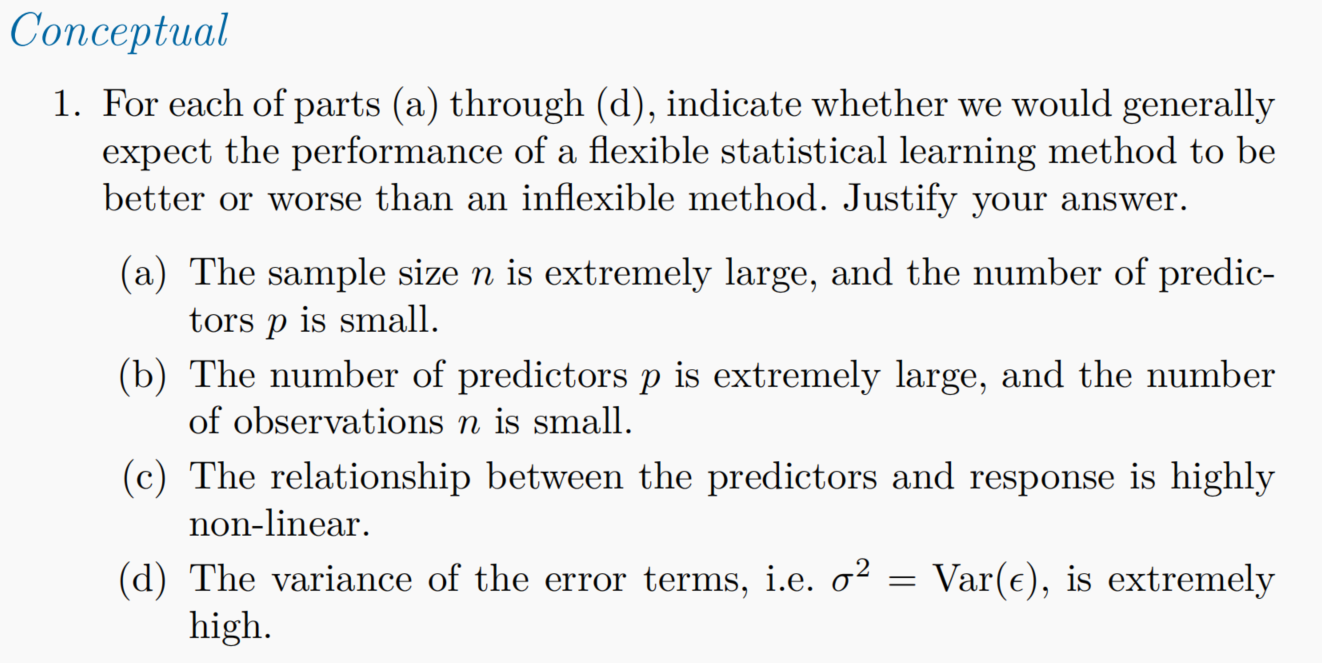

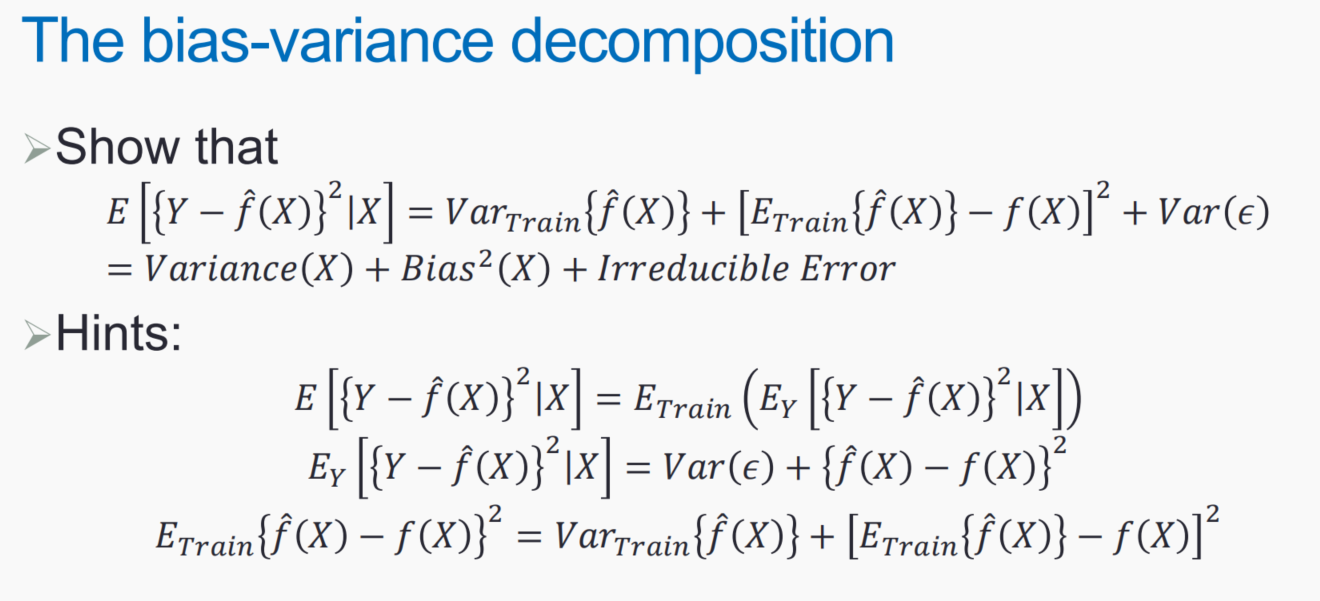

我们按照上图回归模型中提及的test测试集上的MSE的bias-var分解为依据，

然后我们一般认为是更灵活的方法，它的方差会比较大，但是偏差会比较小，即In general, more fexible statistical methods have higher variance.

总之不可约误差，也就是误差的方差我们一般是不可控的，所以我们只考虑关于偏差以及方差的影响因素；

或者我们这么来想，因为更灵活的方法偏差可以控制得比较小，然后不可约误差我们一般没法改变，所以我们可以直接考虑方差的影响，如果方差可以控制得小，我们可以选择更灵活的方法，反之需要考虑不灵活的方法

(1) 样本尺寸很大，但是自变量也就是feature（输入变量）数目很少：

因为灵活模型的偏差比较小，然后p也很少，也就是需要拟合的参数比较少（需要估计的参数比较少），然后样本尺寸更大的话，此处参考下面的模型预测值的方差公式

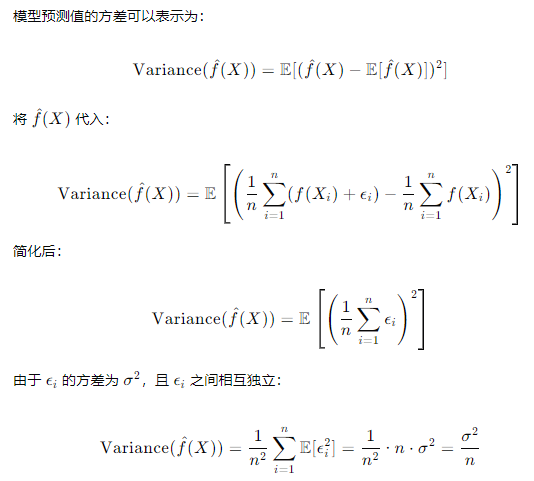

我们可以认为更加灵活的模型的，随着样本量的增加，其方差的影响是能够被控制住的，所以我们还是选择更加灵活的模型，也就是更灵活的模型会有更好的表现

(2) 观测的样本数目很少，但是自变量也就是输入变量的数目很多：

这道题就是和上面的题目反着来了，更加灵活的模型可以考虑到偏差，但是方差无法控制，而且样本数目太少了，很容易过拟合，导致高方差；如果是不灵活的方法，可以控制住方差，还是选择不灵活的方法；
也就是更灵活的模型可能会有更差的表现

(3) 因变量和自变量之间的关系是高度非线性的：

高度非线性，就需要复杂的拟合，选择更加灵活的模型，可以减少偏差，至少不灵活的模型很难做到；更灵活的模型会有更好的表现

(4) 不可约误差项很高：

这个是不可控的，所以无法判断偏差或方差的影响，模型选择无法判断；但总体来说，更灵活的模型偏差会比较小，但是方差会比较大，当然偏差都可以减小，所以更灵活的模型可能表现会比较差

2，

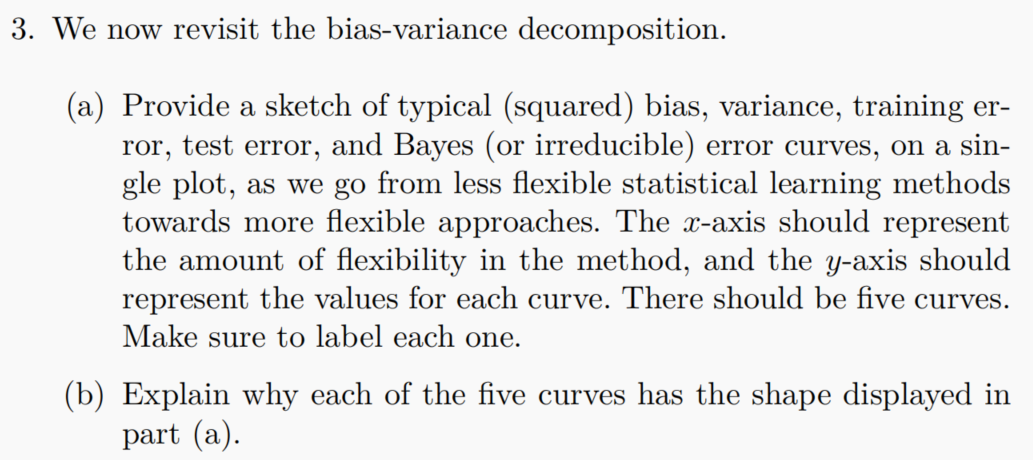

因为是提供草图，所以只要形似即可，当然也可以提供模拟数据进行演示，

然后我们需要提供的指标是偏差bias，方差，训练集以及测试集的误差，以及贝叶斯误差曲线（应该是分类问题中，具有理论最低错分率，当然就是不可约误差最低的那一项）

首先训练误差以及测试误差我们可以形式仿照ppt上的：

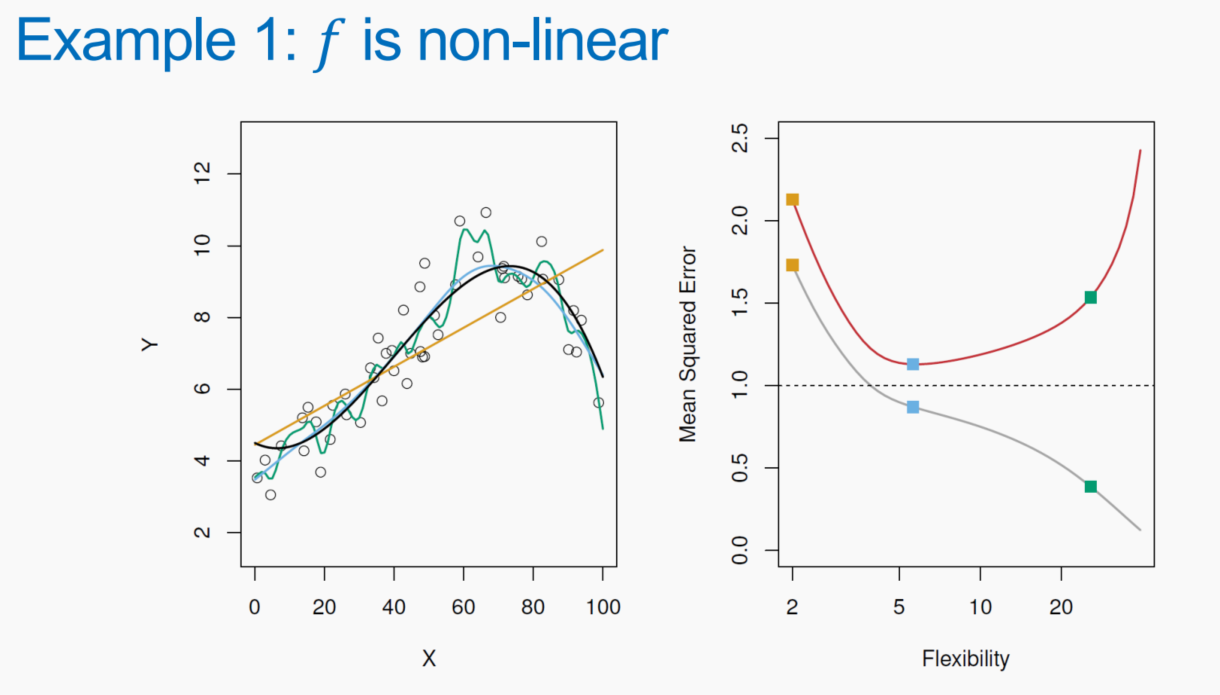
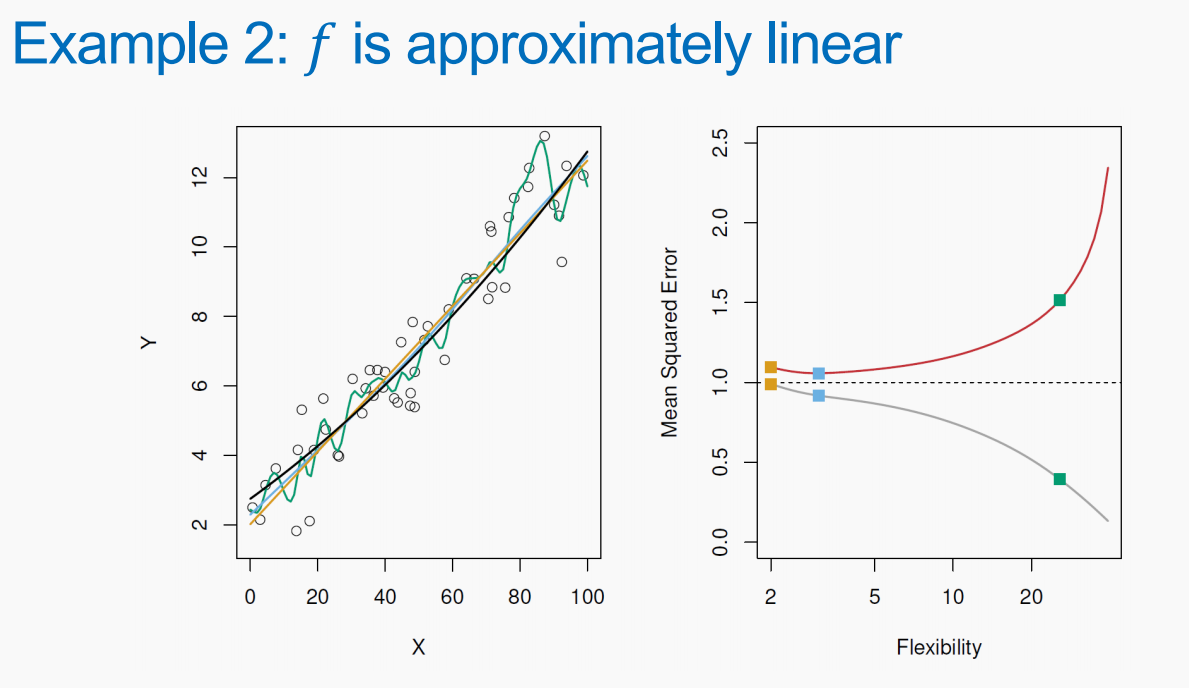
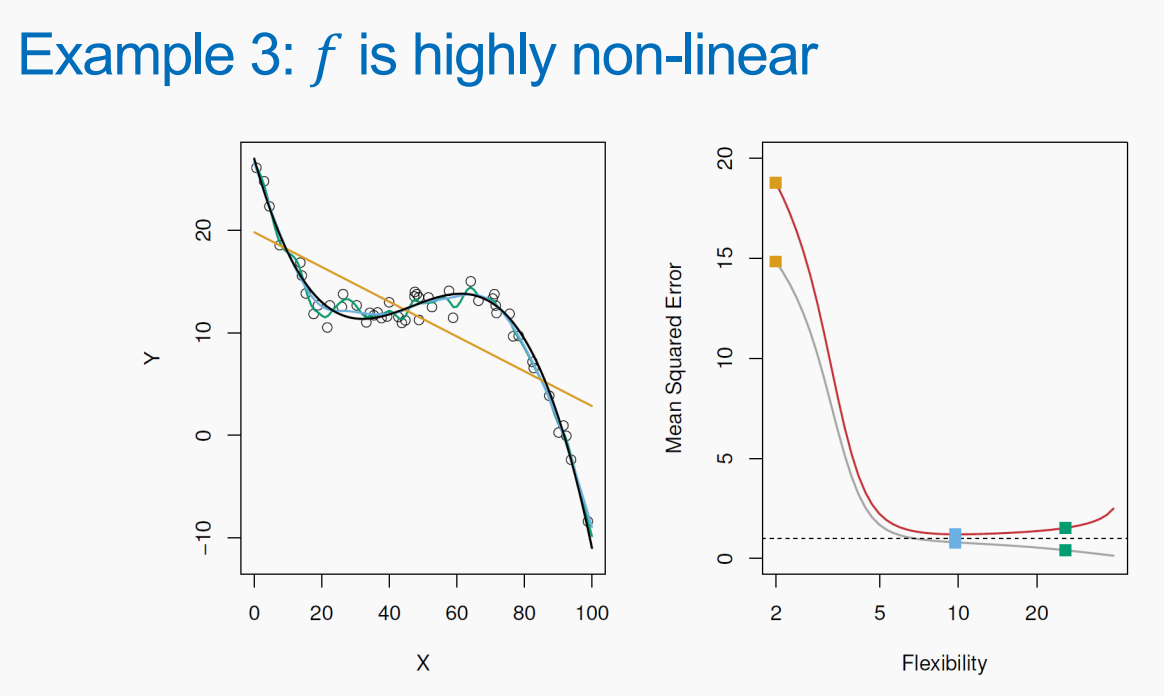

然后解释就是随着模型的灵活性增加，也就是模型越来越复杂，我们可以很轻易的在训练集上减小偏差，但是随之而来的，会导致数据的过拟合，所以一般测试集的error，此处我们使用MSE一般是U形的，也就是先降低再升高；然后训练集上就是单调的减小


再然后就是bias-var分解的曲线我们也可以借鉴：


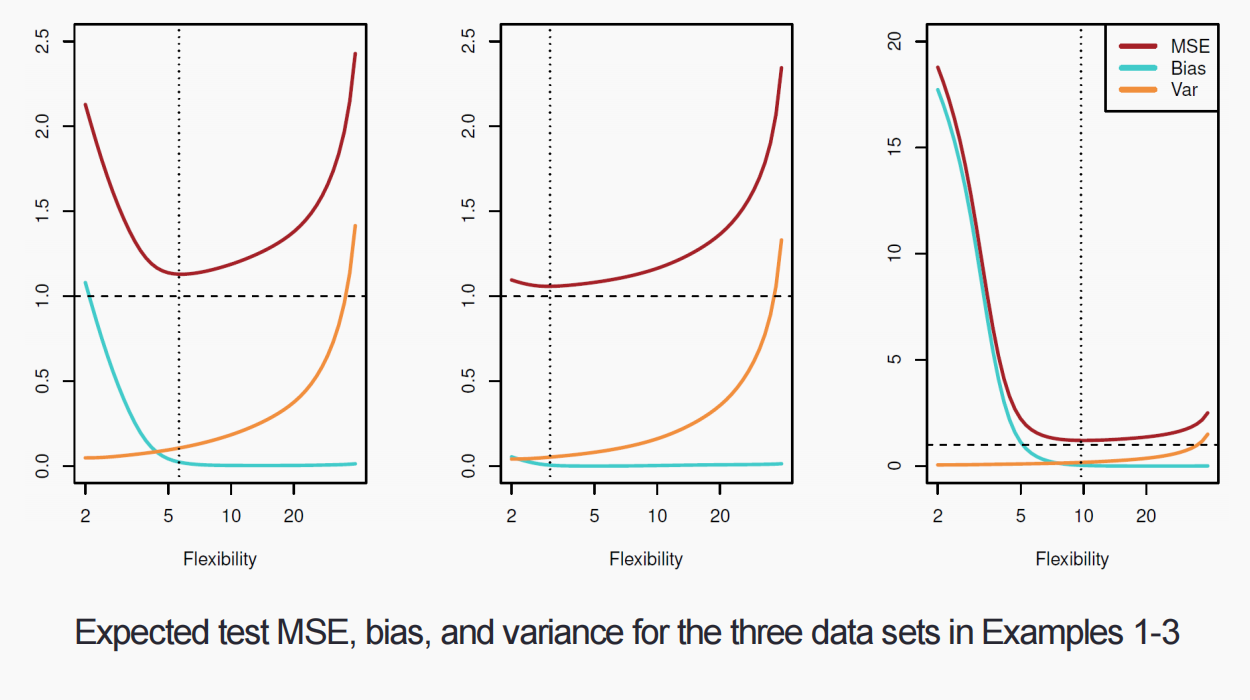

总之我们的草图曲线绘制如下：

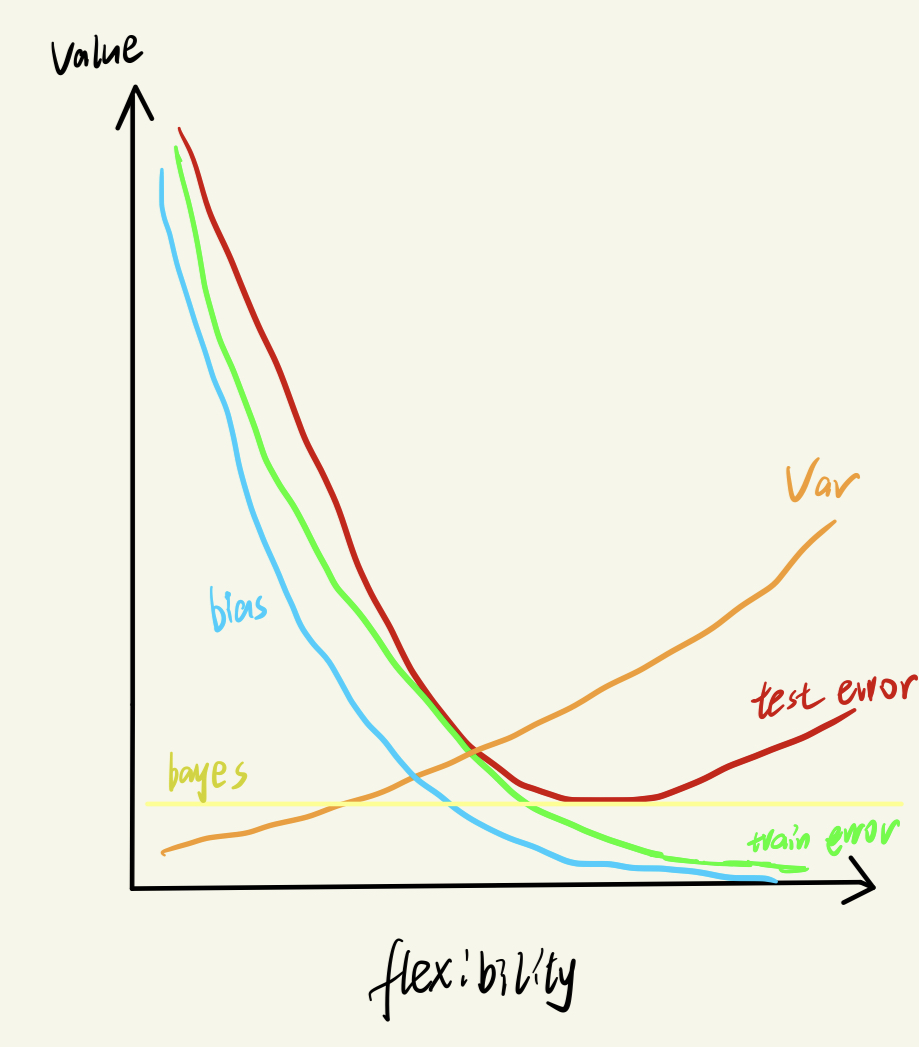

解释如下：

首先是train error，随着模型复杂度，灵活性的增加，我们可以轻易减少偏差，达到在训练集上error的减少，主要是训练集上模型能够完美拟合训练数据，所以训练误差会继续下降，甚至接近于0；

然后test error，同样的，一开始是偏差减少，方差增加，但是偏差减少程度更大，所以会使曲线error下降，但紧接着随着模型越来越灵活，我们的数据在方差上的增加程度会超过偏差的减少程度，包括过拟合现象等，可以看做是bias-var的一个平衡tradeoff；

至于bias，也就是偏差，我们前面就说了，随着模型的复杂度的增加，更加灵活，偏差是可以持续下降的，实际上就是模型预测值与真实值之间的差；

然后方差的话，因为更加灵活的模型，越容易导致过拟合，所以方差会持续增大；

至于不可约误差，因为是理论最低test的error，会是一条水平线，表示任何模型子啊给定数据固有噪声的情况下可以达到的最低误差率，不会随着方法灵活性的变化而变化


8，

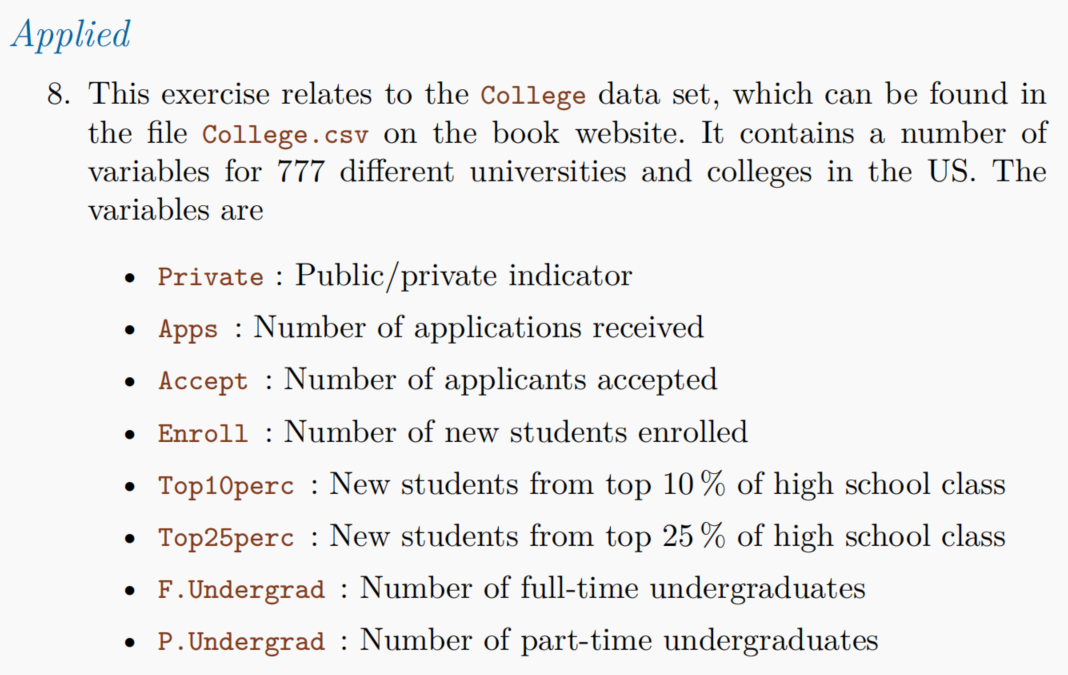
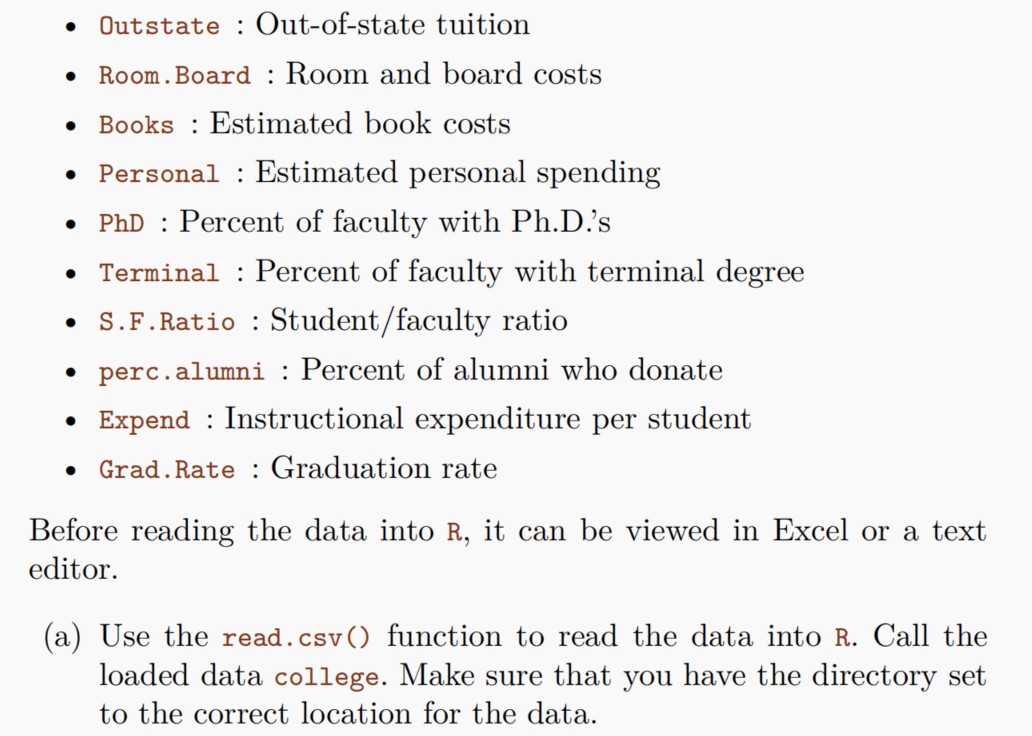
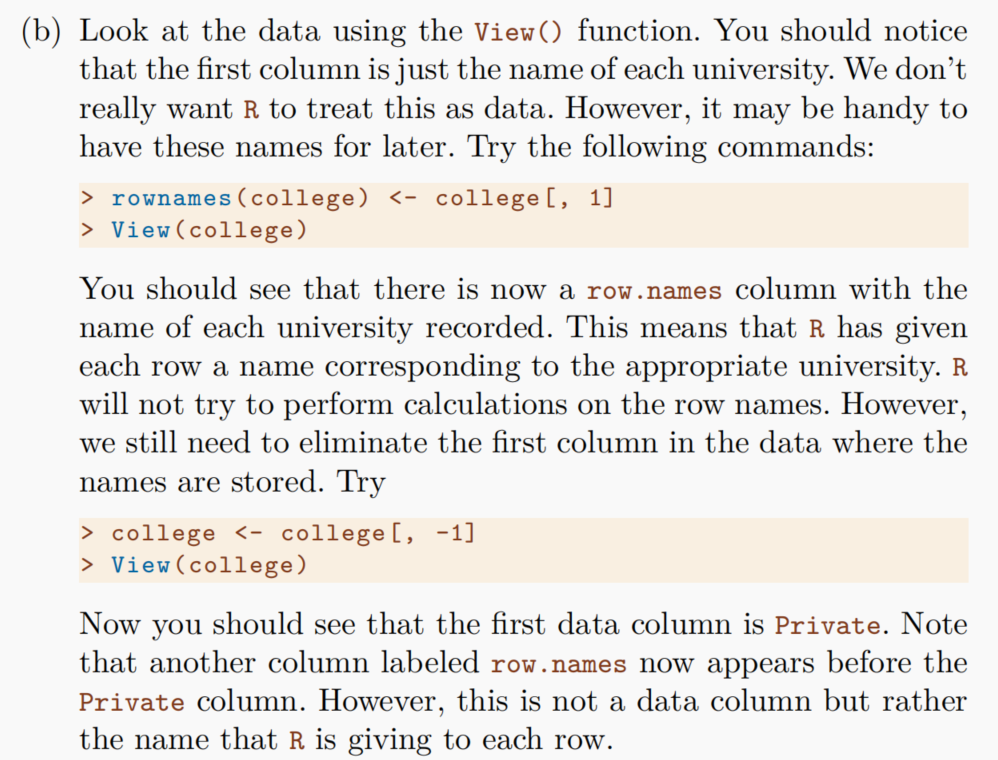
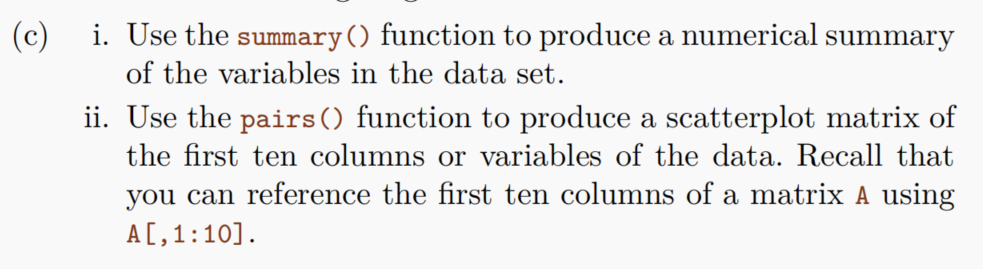
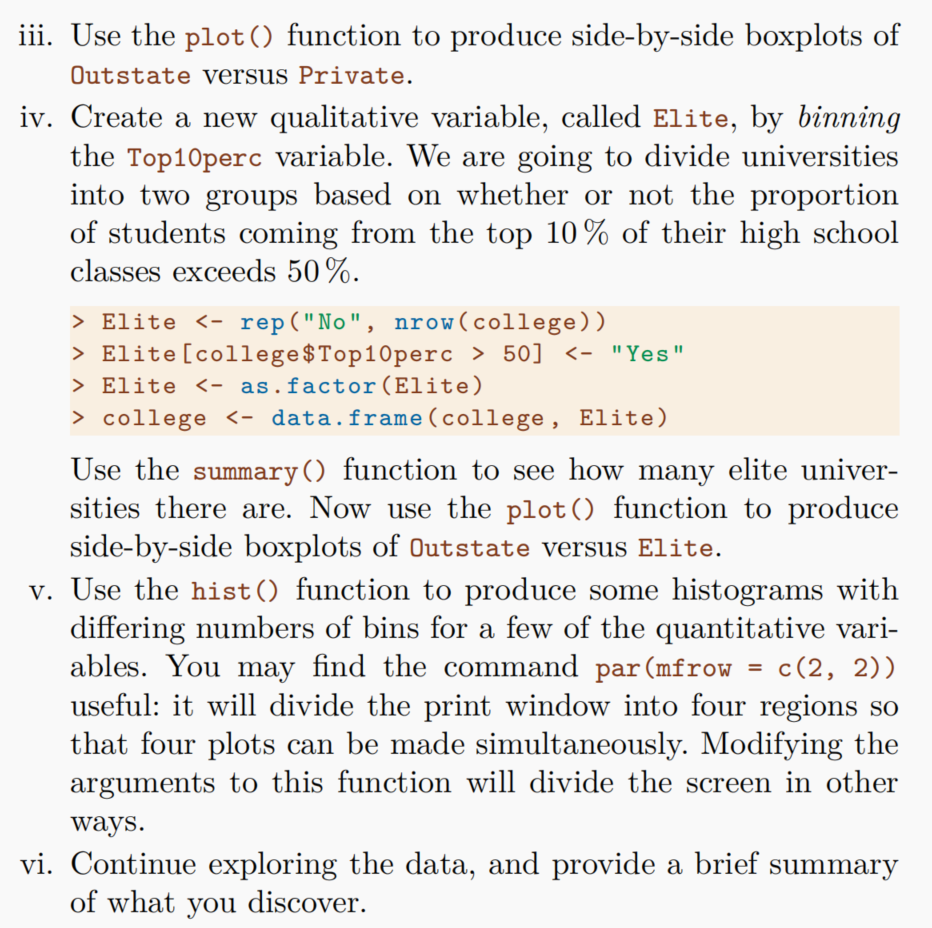

In [ ]:
# a，b

# 注意，数据集需要到https://www.statlearning.com/resources-first-edition中下载
library(tidyverse)

# 读取数据
college <- read_csv("/data1/project/College.csv",col_names = TRUE)
college

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
New names:
• `` -> `...1`
Rows: 777 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ...1, Private
dbl (17): Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1                                    Private Apps  Accept Enroll
1   Abilene Christian University            Yes      1660  1232   721  
2   Adelphi University                      Yes      2186  1924   512  
3   Adrian College                          Yes      1428  1097   336  
4   Agnes Scott College                     Yes       417   349   137  
5   Alaska Pacific University               Yes       193   146    55  
6   Albertson College                       Yes       587   479   158  
7   Albertus Magnus College                 Yes       353   340   103  
8   Albion College                          Yes      1899  1720   489  
9   Albright College                        Yes      1038   839   227  
10  Alderson-Broaddus College               Yes       582   498   172  
11  Alfred University                       Yes      1732  1425   472  
12  Allegheny College                       Yes      2652  1900   484  
13  Allentown Coll. of St. Francis de Sales Yes      1179   780   290  
14  Alma College                            Yes      1267  1080   385  
15  Alverno College                         Yes       494   313   157  
16  American International College          Yes      1420  1093   220  
17  Amherst College                         Yes      4302   992   418  
18  Anderson University                     Yes      1216   908   423  
19  Andrews University                      Yes      1130   704   322  
20  Angelo State University                 No       3540  2001  1016  
21  Antioch University                      Yes       713   661   252  
22  Appalachian State University            No       7313  4664  1910  
23  Aquinas College                         Yes       619   516   219  
24  Arizona State University Main campus    No      12809 10308  3761  
25  Arkansas College (Lyon College)         Yes       708   334   166  
26  Arkansas Tech University                No       1734  1729   951  
27  Assumption College                      Yes      2135  1700   491  
28  Auburn University-Main Campus           No       7548  6791  3070  
29  Augsburg College                        Yes       662   513   257  
30  Augustana College IL                    Yes      1879  1658   497  
⋮   ⋮                                       ⋮       ⋮     ⋮      ⋮     
748 Westfield State College                 No       3100 2150    825  
749 Westminster College MO                  Yes       662  553    184  
750 Westminster College                     Yes       996  866    377  
751 Westminster College of Salt Lake City   Yes       917  720    213  
752 Westmont College                        No        950  713    351  
753 Wheaton College IL                      Yes      1432  920    548  
754 Westminster College PA                  Yes      1738 1373    417  
755 Wheeling Jesuit College                 Yes       903  755    213  
756 Whitman College                         Yes      1861  998    359  
757 Whittier College                        Yes      1681 1069    344  
758 Whitworth College                       Yes      1121  926    372  
759 Widener University                      Yes      2139 1492    502  
760 Wilkes University                       Yes      1631 1431    434  
761 Willamette University                   Yes      1658 1327    395  
762 William Jewell College                  Yes       663  547    315  
763 William Woods University                Yes       469  435    227  
764 Williams College                        Yes      4186 1245    526  
765 Wilson College                          Yes       167  130     46  
766 Wingate College                         Yes      1239 1017    383  
767 Winona State University                 No       3325 2047   1301  
768 Winthrop University                     No       2320 1805    769  
769 Wisconsin Lutheran College              Yes       152  128     75  
770 Wittenberg University                   Yes      1979 1739    575  
771 Wofford College                         

In [ ]:
# 我们首先来查看一些这些数据的基本信息

# 维度
dim(college)  # 777x19，也就是777行以及19列

rownames(x = college)  # 行索引index，我们需要查看第1列

colnames(x = college)  # 列名names,发现是'...1'

college[,'...1'] #这些学校

[1] 777  19

[1] "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"   "10"  "11"  "12" 
 [13] "13"  "14"  "15"  "16"  "17"  "18"  "19"  "20"  "21"  "22"  "23"  "24" 
 [25] "25"  "26"  "27"  "28"  "29"  "30"  "31"  "32"  "33"  "34"  "35"  "36" 
 [37] "37"  "38"  "39"  "40"  "41"  "42"  "43"  "44"  "45"  "46"  "47"  "48" 
 [49] "49"  "50"  "51"  "52"  "53"  "54"  "55"  "56"  "57"  "58"  "59"  "60" 
 [61] "61"  "62"  "63"  "64"  "65"  "66"  "67"  "68"  "69"  "70"  "71"  "72" 
 [73] "73"  "74"  "75"  "76"  "77"  "78"  "79"  "80"  "81"  "82"  "83"  "84" 
 [85] "85"  "86"  "87"  "88"  "89"  "90"  "91"  "92"  "93"  "94"  "95"  "96" 
 [97] "97"  "98"  "99"  "100" "101" "102" "103" "104" "105" "106" "107" "108"
[109] "109" "110" "111" "112" "113" "114" "115" "116" "117" "118" "119" "120"
[121] "121" "122" "123" "124" "125" "126" "127" "128" "129" "130" "131" "132"
[133] "133" "134" "135" "136" "137" "138" "139" "140" "141" "142" "143" "144"
[145] "145" "146" "147" "148" "149" "150" "151" "152" "153" "154" "155" "156"
[157] "157" "158" "159" "160" "161" "162" "163" "164" "165" "166" "167" "168"
[169] "169" "170" "171" "172" "173" "174" "175" "176" "177" "178" "179" "180"
[181] "181" "182" "183" "184" "185" "186" "187" "188" "189" "190" "191" "192"
[193] "193" "194" "195" "196" "197" "198" "199" "200" "201" "202" "203" "204"
[205] "205" "206" "207" "208" "209" "210" "211" "212" "213" "214" "215" "216"
[217] "217" "218" "219" "220" "221" "222" "223" "224" "225" "226" "227" "228"
[229] "229" "230" "231" "232" "233" "234" "235" "236" "237" "238" "239" "240"
[241] "241" "242" "243" "244" "245" "246" "247" "248" "249" "250" "251" "252"
[253] "253" "254" "255" "256" "257" "258" "259" "260" "261" "262" "263" "264"
[265] "265" "266" "267" "268" "269" "270" "271" "272" "273" "274" "275" "276"
[277] "277" "278" "279" "280" "281" "282" "283" "284" "285" "286" "287" "288"
[289] "289" "290" "291" "292" "293" "294" "295" "296" "297" "298" "299" "300"
[301] "301" "302" "303" "304" "305" "306" "307" "308" "309" "310" "311" "312"
[313] "313" "314" "315" "316" "317" "318" "319" "320" "321" "322" "323" "324"
[325] "325" "326" "327" "328" "329" "330" "331" "332" "333" "334" "335" "336"
[337] "337" "338" "339" "340" "341" "342" "343" "344" "345" "346" "347" "348"
[349] "349" "350" "351" "352" "353" "354" "355" "356" "357" "358" "359" "360"
[361] "361" "362" "363" "364" "365" "366" "367" "368" "369" "370" "371" "372"
[373] "373" "374" "375" "376" "377" "378" "379" "380" "381" "382" "383" "384"
[385] "385" "386" "387" "388" "389" "390" "391" "392" "393" "394" "395" "396"
[397] "397" "398" "399" "400" "401" "402" "403" "404" "405" "406" "407" "408"
[409] "409" "410" "411" "412" "413" "414" "415" "416" "417" "418" "419" "420"
[421] "421" "422" "423" "424" "425" "426" "427" "428" "429" "430" "431" "432"
[433] "433" "434" "435" "436" "437" "438" "439" "440" "441" "442" "443" "444"
[445] "445" "446" "447" "448" "449" "450" "451" "452" "453" "454" "455" "456"
[457] "457" "458" "459" "460" "461" "462" "463" "464" "465" "466" "467" "468"
[469] "469" "470" "471" "472" "473" "474" "475" "476" "477" "478" "479" "480"
[481] "481" "482" "483" "484" "485" "486" "487" "488" "489" "490" "491" "492"
[493] "493" "494" "495" "496" "497" "498" "499" "500" "501" "502" "503" "504"
[505] "505" "506" "507" "508" "509" "510" "511" "512" "513" "514" "515" "516"
[517] "517" "518" "519" "520" "521" "522" "523" "524" "525" "526" "527" "528"
[529] "529" "530" "531" "532" "533" "534" "535" "536" "537" "538" "539" "540"
[541] "541" "542" "543" "544" "545" "546" "547" "548" "549" "550" "551" "552"
[553] "553" "554" "555" "556" "557" "558" "559" "560" "561" "562" "563" "564"
[565] "565" "566" "567" "568" "569" "570" "571" "572" "573" "574" "575" "576"
[577] "577" "578" "579" "580" "581" "582" "583" "584" "585" "586" "587" "588"
[589] "589" "590" "591" "592" "593" "594" "595" "596" "597" "598" "599" "600"
[601] "601" "602" "603" "604" "605" "606" "607" "608" "609" "610" "611" "612"
[613] "613" "614" "615" 

[1] "...1"        "Private"     "Apps"        "Accept"      "Enroll"     
 [6] "Top10perc"   "Top25perc"   "F.Undergrad" "P.Undergrad" "Outstate"   
[11] "Room.Board"  "Books"       "Personal"    "PhD"         "Terminal"   
[16] "S.F.Ratio"   "perc.alumni" "Expend"      "Grad.Rate"

...1                                   
1   Abilene Christian University           
2   Adelphi University                     
3   Adrian College                         
4   Agnes Scott College                    
5   Alaska Pacific University              
6   Albertson College                      
7   Albertus Magnus College                
8   Albion College                         
9   Albright College                       
10  Alderson-Broaddus College              
11  Alfred University                      
12  Allegheny College                      
13  Allentown Coll. of St. Francis de Sales
14  Alma College                           
15  Alverno College                        
16  American International College         
17  Amherst College                        
18  Anderson University                    
19  Andrews University                     
20  Angelo State University                
21  Antioch University                     
22  Appalachian State University           
23  Aquinas College                        
24  Arizona State University Main campus   
25  Arkansas College (Lyon College)        
26  Arkansas Tech University               
27  Assumption College                     
28  Auburn University-Main Campus          
29  Augsburg College                       
30  Augustana College IL                   
⋮   ⋮                                      
748 Westfield State College                
749 Westminster College MO                 
750 Westminster College                    
751 Westminster College of Salt Lake City  
752 Westmont College                       
753 Wheaton College IL                     
754 Westminster College PA                 
755 Wheeling Jesuit College                
756 Whitman College                        
757 Whittier College                       
758 Whitworth College                      
759 Widener University                     
760 Wilkes University                      
761 Willamette University                  
762 William Jewell College                 
763 William Woods University               
764 Williams College                       
765 Wilson College                         
766 Wingate College                        
767 Winona State University                
768 Winthrop University                    
769 Wisconsin Lutheran College             
770 Wittenberg University                  
771 Wofford College                        
772 Worcester Polytechnic Institute        
773 Worcester State College                
774 Xavier University                      
775 Xavier University of Louisiana         
776 Yale University                        
777 York College of Pennsylvania

In [ ]:
# 上面的问题就是我们需要将学校名设置为行名，其实就是obs观测

college <- read.csv("/data1/project/College.csv")

# rownnames(college) <- college[,'...1'] #这是按照逻辑索引

rownames(college) <- college[,1]  #这是按照数字下标索引，我们采用这种
# head(college)

# view(college)  # 需要在rstudio中查看，我们可以在vscode中也配置相关插件

# 我们暂时只使用head，或者是rownames来查看效果

head(college)

# rownames(college) 

college <- college[, -1] # 去除第1列

head(college)


X                            Private Apps Accept
Abilene Christian University Abilene Christian University Yes     1660 1232  
Adelphi University           Adelphi University           Yes     2186 1924  
Adrian College               Adrian College               Yes     1428 1097  
Agnes Scott College          Agnes Scott College          Yes      417  349  
Alaska Pacific University    Alaska Pacific University    Yes      193  146  
Albertson College            Albertson College            Yes      587  479  
                             Enroll Top10perc Top25perc F.Undergrad P.Undergrad
Abilene Christian University 721    23        52        2885         537       
Adelphi University           512    16        29        2683        1227       
Adrian College               336    22        50        1036          99       
Agnes Scott College          137    60        89         510          63       
Alaska Pacific University     55    16        44         249         869       
Albertson College            158    38        62         678          41       
                             Outstate Room.Board Books Personal PhD Terminal
Abilene Christian University  7440    3300       450   2200     70  78      
Adelphi University           12280    6450       750   1500     29  30      
Adrian College               11250    3750       400   1165     53  66      
Agnes Scott College          12960    5450       450    875     92  97      
Alaska Pacific University     7560    4120       800   1500     76  72      
Albertson College            13500    3335       500    675     67  73      
                             S.F.Ratio perc.alumni Expend Grad.Rate
Abilene Christian University 18.1      12           7041  60       
Adelphi University           12.2      16          10527  56       
Adrian College               12.9      30           8735  54       
Agnes Scott College           7.7      37          19016  59       
Alaska Pacific University    11.9       2          10922  15       
Albertson College             9.4      11           9727  55

Private Apps Accept Enroll Top10perc Top25perc
Abilene Christian University Yes     1660 1232   721    23        52       
Adelphi University           Yes     2186 1924   512    16        29       
Adrian College               Yes     1428 1097   336    22        50       
Agnes Scott College          Yes      417  349   137    60        89       
Alaska Pacific University    Yes      193  146    55    16        44       
Albertson College            Yes      587  479   158    38        62       
                             F.Undergrad P.Undergrad Outstate Room.Board Books
Abilene Christian University 2885         537         7440    3300       450  
Adelphi University           2683        1227        12280    6450       750  
Adrian College               1036          99        11250    3750       400  
Agnes Scott College           510          63        12960    5450       450  
Alaska Pacific University     249         869         7560    4120       800  
Albertson College             678          41        13500    3335       500  
                             Personal PhD Terminal S.F.Ratio perc.alumni Expend
Abilene Christian University 2200     70  78       18.1      12           7041 
Adelphi University           1500     29  30       12.2      16          10527 
Adrian College               1165     53  66       12.9      30           8735 
Agnes Scott College           875     92  97        7.7      37          19016 
Alaska Pacific University    1500     76  72       11.9       2          10922 
Albertson College             675     67  73        9.4      11           9727 
                             Grad.Rate
Abilene Christian University 60       
Adelphi University           56       
Adrian College               54       
Agnes Scott College          59       
Alaska Pacific University    15       
Albertson College            55

In [ ]:
# 上面的方法对于df是适用的，但是我们用的是tidyverse，所以有tibble专门的列名转行名的方法
college <- read_csv("/data1/project/College.csv",col_names = TRUE)
college <- college %>% column_to_rownames(var = "...1")
# 这种方法就不用手动移除第1列了

head(college)
# rownames(college)

New names:
• `` -> `...1`
Rows: 777 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ...1, Private
dbl (17): Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Private Apps Accept Enroll Top10perc Top25perc
Abilene Christian University Yes     1660 1232   721    23        52       
Adelphi University           Yes     2186 1924   512    16        29       
Adrian College               Yes     1428 1097   336    22        50       
Agnes Scott College          Yes      417  349   137    60        89       
Alaska Pacific University    Yes      193  146    55    16        44       
Albertson College            Yes      587  479   158    38        62       
                             F.Undergrad P.Undergrad Outstate Room.Board Books
Abilene Christian University 2885         537         7440    3300       450  
Adelphi University           2683        1227        12280    6450       750  
Adrian College               1036          99        11250    3750       400  
Agnes Scott College           510          63        12960    5450       450  
Alaska Pacific University     249         869         7560    4120       800  
Albertson College             678          41        13500    3335       500  
                             Personal PhD Terminal S.F.Ratio perc.alumni Expend
Abilene Christian University 2200     70  78       18.1      12           7041 
Adelphi University           1500     29  30       12.2      16          10527 
Adrian College               1165     53  66       12.9      30           8735 
Agnes Scott College           875     92  97        7.7      37          19016 
Alaska Pacific University    1500     76  72       11.9       2          10922 
Albertson College             675     67  73        9.4      11           9727 
                             Grad.Rate
Abilene Christian University 60       
Adelphi University           56       
Adrian College               54       
Agnes Scott College          59       
Alaska Pacific University    15       
Albertson College            55

In [ ]:
# 然后就是一些基本的统计
summary(college) #基本上就是提供每一列变量列的一些统计量

   Private               Apps           Accept          Enroll    
 Length:777         Min.   :   81   Min.   :   72   Min.   :  35  
 Class :character   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242  
 Mode  :character   Median : 1558   Median : 1110   Median : 434  
                    Mean   : 3002   Mean   : 2019   Mean   : 780  
                    3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902  
                    Max.   :48094   Max.   :26330   Max.   :6392  
   Top10perc       Top25perc      F.Undergrad     P.Undergrad     
 Min.   : 1.00   Min.   :  9.0   Min.   :  139   Min.   :    1.0  
 1st Qu.:15.00   1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0  
 Median :23.00   Median : 54.0   Median : 1707   Median :  353.0  
 Mean   :27.56   Mean   : 55.8   Mean   : 3700   Mean   :  855.3  
 3rd Qu.:35.00   3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0  
 Max.   :96.00   Max.   :100.0   Max.   :31643   Max.   :21836.0  
    Outstate       Room.Board       Books           Personal  

In [ ]:
college <- read.csv("/data1/project/College.csv")
rownames(college) <- college[,1]  #这是按照数字下标索引，我们采用这种
college <- college[, -1] # 去除第1列
college

Private Apps  Accept Enroll Top10perc
Abilene Christian University            Yes      1660  1232   721   23       
Adelphi University                      Yes      2186  1924   512   16       
Adrian College                          Yes      1428  1097   336   22       
Agnes Scott College                     Yes       417   349   137   60       
Alaska Pacific University               Yes       193   146    55   16       
Albertson College                       Yes       587   479   158   38       
Albertus Magnus College                 Yes       353   340   103   17       
Albion College                          Yes      1899  1720   489   37       
Albright College                        Yes      1038   839   227   30       
Alderson-Broaddus College               Yes       582   498   172   21       
Alfred University                       Yes      1732  1425   472   37       
Allegheny College                       Yes      2652  1900   484   44       
Allentown Coll. of St. Francis de Sales Yes      1179   780   290   38       
Alma College                            Yes      1267  1080   385   44       
Alverno College                         Yes       494   313   157   23       
American International College          Yes      1420  1093   220    9       
Amherst College                         Yes      4302   992   418   83       
Anderson University                     Yes      1216   908   423   19       
Andrews University                      Yes      1130   704   322   14       
Angelo State University                 No       3540  2001  1016   24       
Antioch University                      Yes       713   661   252   25       
Appalachian State University            No       7313  4664  1910   20       
Aquinas College                         Yes       619   516   219   20       
Arizona State University Main campus    No      12809 10308  3761   24       
Arkansas College (Lyon College)         Yes       708   334   166   46       
Arkansas Tech University                No       1734  1729   951   12       
Assumption College                      Yes      2135  1700   491   23       
Auburn University-Main Campus           No       7548  6791  3070   25       
Augsburg College                        Yes       662   513   257   12       
Augustana College IL                    Yes      1879  1658   497   36       
⋮                                       ⋮       ⋮     ⋮      ⋮      ⋮        
Westfield State College                 No       3100 2150    825    3       
Westminster College MO                  Yes       662  553    184   20       
Westminster College                     Yes       996  866    377   29       
Westminster College of Salt Lake City   Yes       917  720    213   21       
Westmont College                        No        950  713    351   42       
Wheaton College IL                      Yes      1432  920    548   56       
Westminster College PA                  Yes      1738 1373    417   21       
Wheeling Jesuit College                 Yes       903  755    213   15       
Whitman College                         Yes      1861  998    359   45       
Whittier College                        Yes      1681 1069    344   35       
Whitworth College                       Yes      1121  926    372   43       
Widener University                      Yes      2139 1492    502   24       
Wilkes University                       Yes      1631 1431    434   15       
Willamette University                   Yes      1658 1327    395   49       
William Jewell College                  Yes       663  547    315   32       
William Woods University                Yes       469  435    227   17       
Williams College                        Yes      4186 1245    526   81       
Wilson College                          Yes       167  130     46   16       
Wingate College                         Yes      1239 1017    383   10       
Winona State University                 No       3325 2047   1

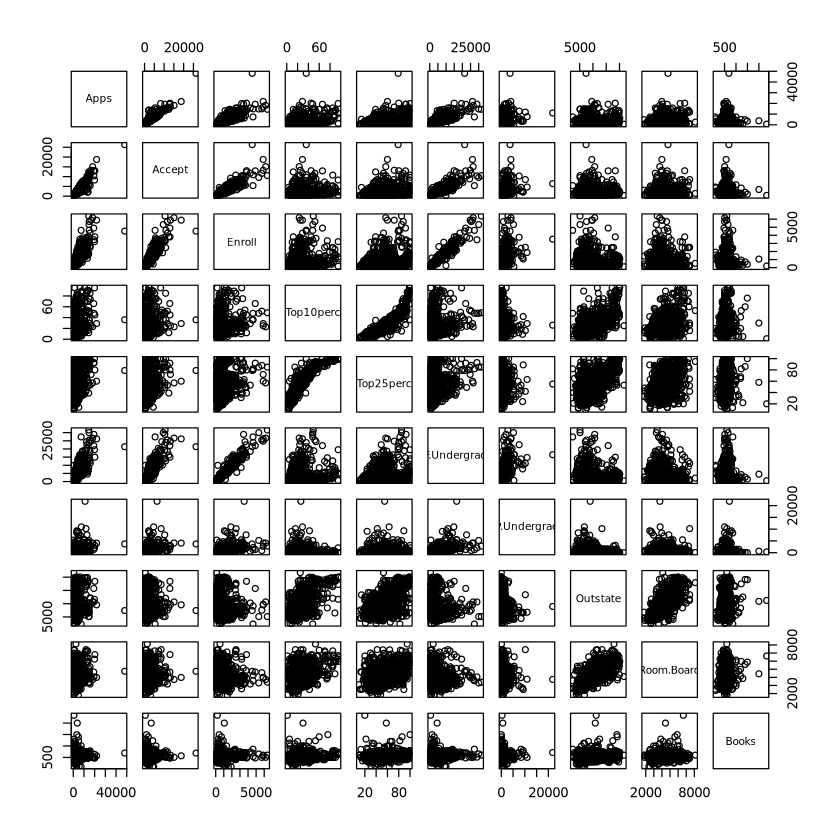

In [ ]:
# c

# college[,1:10] 

college <- read.csv("/data1/project/College.csv")
rownames(college) <- college[,1]  #这是按照数字下标索引，我们采用这种
college <- college[, -1] # 去除第1列

# 因为private是chr列，所以建议去除private列再绘制相关性矩阵
# college[,-1][,1:10] #这样就去除了private列
pairs(college[,-1][,1:10]) # 画出pairwise scatter plot,其实就是两两变量之间的成对散点图矩阵

# vscode中无法查看，所产生图截图之后在md中展示

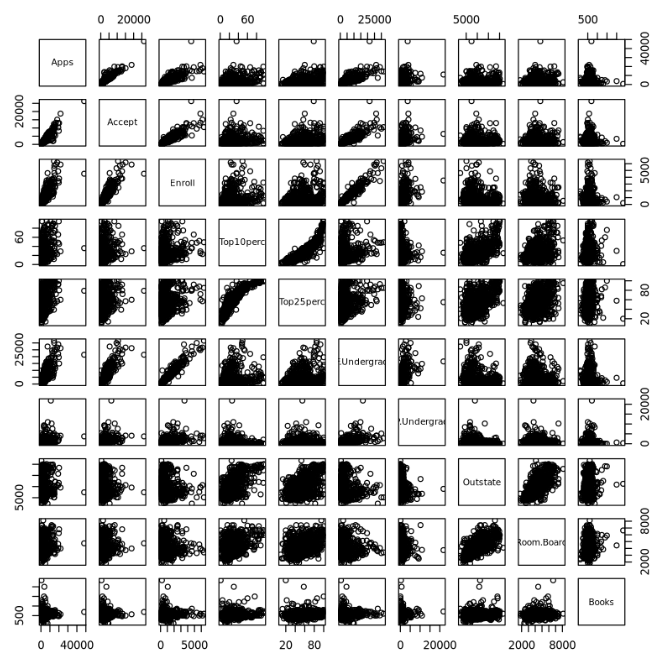

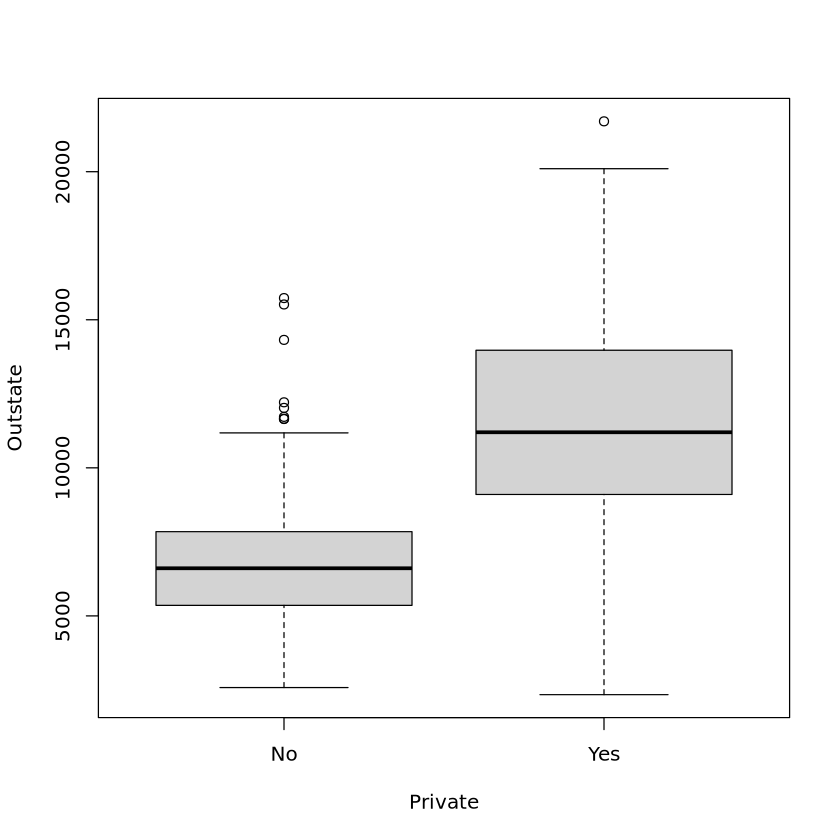

In [ ]:
# 简单绘图，绘制箱线图
boxplot(Outstate~Private,data=college) 


# 后来发现不是因为jupyter渲染的问题，而是theme的问题，选择dark的话前面以及后面绘制的图就会变成黑色的背景，所以我们需要将theme设置为light

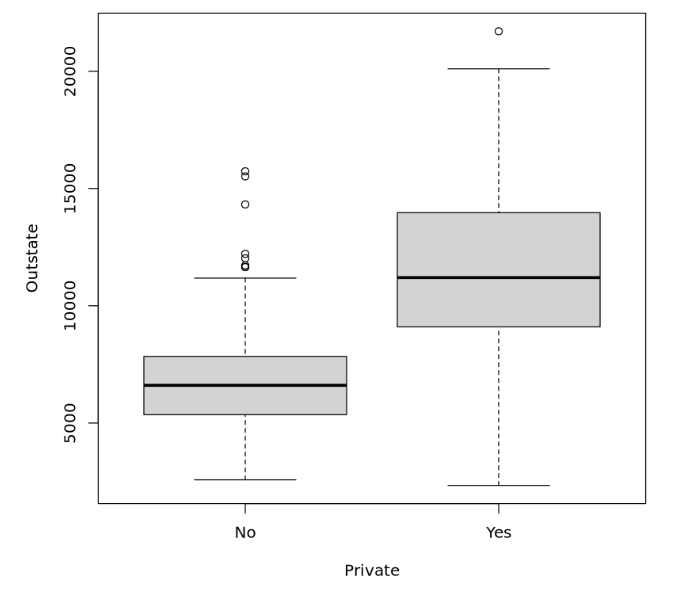

后来发现不是因为jupyter渲染的问题，而是theme的问题，选择dark的话前面以及后面绘制的图就会变成黑色的背景，所以我们需要将theme设置为light

不过jupyter在网页版打开应该是一致的，能够看见

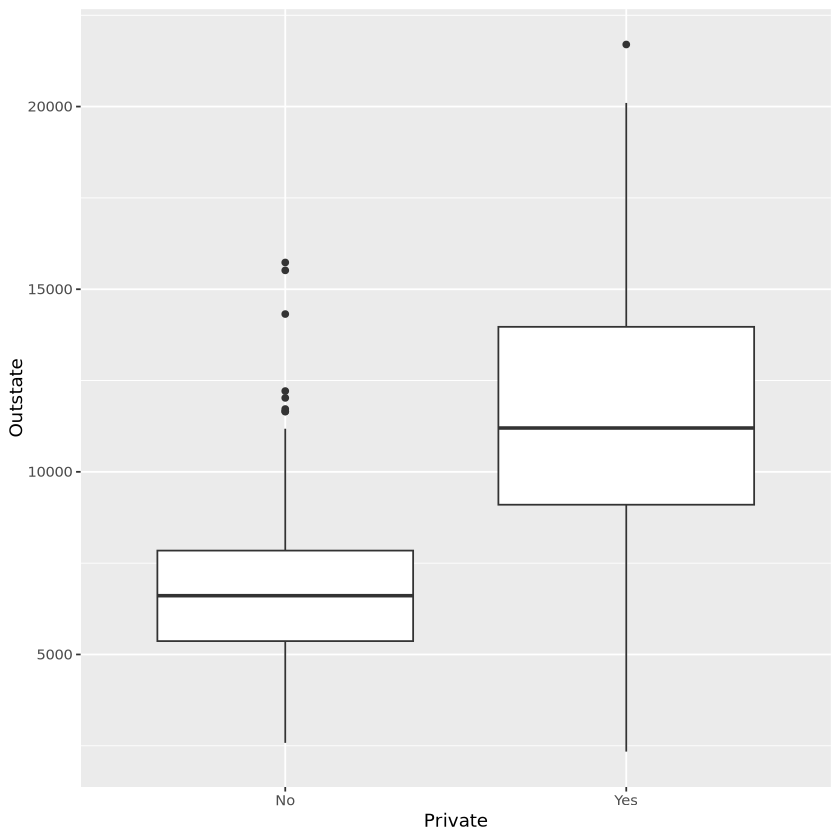

In [ ]:
# library(tidyverse)
college %>% ggplot(mapping = aes(y=Outstate, x=Private)) + geom_boxplot() 

# ggplot系列的不改theme的话，背景是白色的，所以我们可以直接使用ggplot

In [ ]:
Elite <- rep("No", nrow(college))  #初始化为No，college的行数次重复,数据类型同No，也是字符型
# class(rep("No", nrow(college)) ) # "character"
Elite[college$Top10perc > 50] <- "Yes" # 依赖于向量与数据帧行数的一一对应关系,实际上就是筛选index行数
Elite <- as.factor(Elite) # 转化为factor
college <- data.frame(college, Elite) # 再转化为dataframe

In [ ]:
head(college)

Private Apps Accept Enroll Top10perc Top25perc
Abilene Christian University Yes     1660 1232   721    23        52       
Adelphi University           Yes     2186 1924   512    16        29       
Adrian College               Yes     1428 1097   336    22        50       
Agnes Scott College          Yes      417  349   137    60        89       
Alaska Pacific University    Yes      193  146    55    16        44       
Albertson College            Yes      587  479   158    38        62       
                             F.Undergrad P.Undergrad Outstate Room.Board Books
Abilene Christian University 2885         537         7440    3300       450  
Adelphi University           2683        1227        12280    6450       750  
Adrian College               1036          99        11250    3750       400  
Agnes Scott College           510          63        12960    5450       450  
Alaska Pacific University     249         869         7560    4120       800  
Albertson College             678          41        13500    3335       500  
                             Personal PhD Terminal S.F.Ratio perc.alumni Expend
Abilene Christian University 2200     70  78       18.1      12           7041 
Adelphi University           1500     29  30       12.2      16          10527 
Adrian College               1165     53  66       12.9      30           8735 
Agnes Scott College           875     92  97        7.7      37          19016 
Alaska Pacific University    1500     76  72       11.9       2          10922 
Albertson College             675     67  73        9.4      11           9727 
                             Grad.Rate Elite
Abilene Christian University 60        No   
Adelphi University           56        No   
Adrian College               54        No   
Agnes Scott College          59        Yes  
Alaska Pacific University    15        No   
Albertson College            55        No

In [ ]:
# 当然上面的操作也可以使用tidyverse完成，比如说我们有新的1列，称之为elite
college %>% mutate(elite = ifelse(Top10perc > 50, "Yes", "No")) %>% head()

Private Apps Accept Enroll Top10perc Top25perc
Abilene Christian University Yes     1660 1232   721    23        52       
Adelphi University           Yes     2186 1924   512    16        29       
Adrian College               Yes     1428 1097   336    22        50       
Agnes Scott College          Yes      417  349   137    60        89       
Alaska Pacific University    Yes      193  146    55    16        44       
Albertson College            Yes      587  479   158    38        62       
                             F.Undergrad P.Undergrad Outstate Room.Board Books
Abilene Christian University 2885         537         7440    3300       450  
Adelphi University           2683        1227        12280    6450       750  
Adrian College               1036          99        11250    3750       400  
Agnes Scott College           510          63        12960    5450       450  
Alaska Pacific University     249         869         7560    4120       800  
Albertson College             678          41        13500    3335       500  
                             Personal PhD Terminal S.F.Ratio perc.alumni Expend
Abilene Christian University 2200     70  78       18.1      12           7041 
Adelphi University           1500     29  30       12.2      16          10527 
Adrian College               1165     53  66       12.9      30           8735 
Agnes Scott College           875     92  97        7.7      37          19016 
Alaska Pacific University    1500     76  72       11.9       2          10922 
Albertson College             675     67  73        9.4      11           9727 
                             Grad.Rate Elite elite
Abilene Christian University 60        No    No   
Adelphi University           56        No    No   
Adrian College               54        No    No   
Agnes Scott College          59        Yes   Yes  
Alaska Pacific University    15        No    No   
Albertson College            55        No    No

No Yes 
699  78

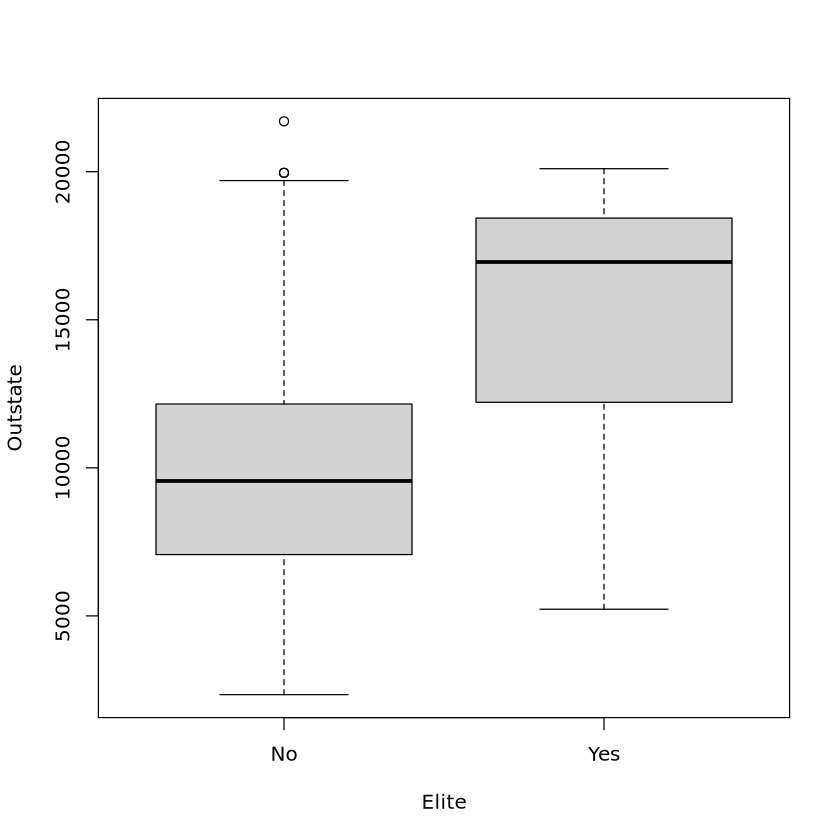

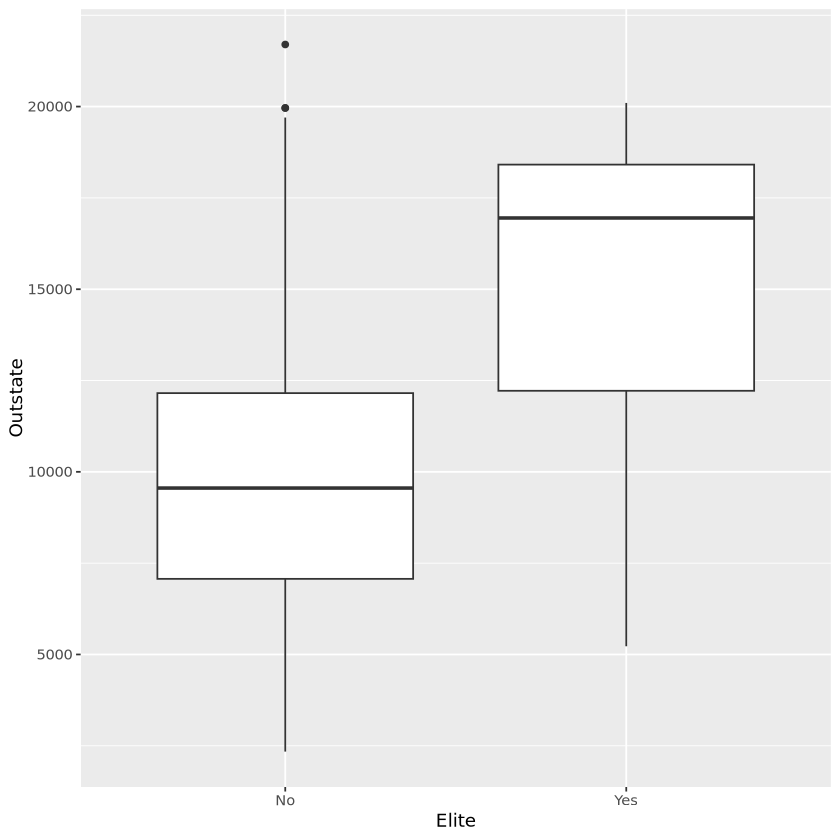

In [ ]:
summary(college$Elite)
boxplot(Outstate~Elite,college) # 建议还是使用ggplot出图
college %>% ggplot(mapping = aes(y=Outstate, x=Elite)) + geom_boxplot()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


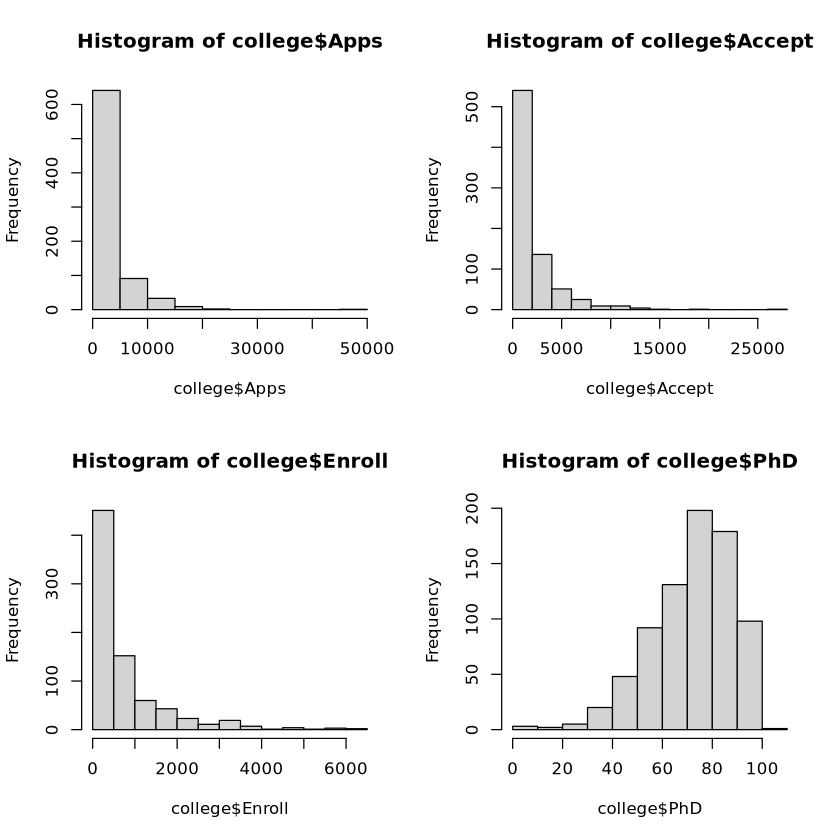

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


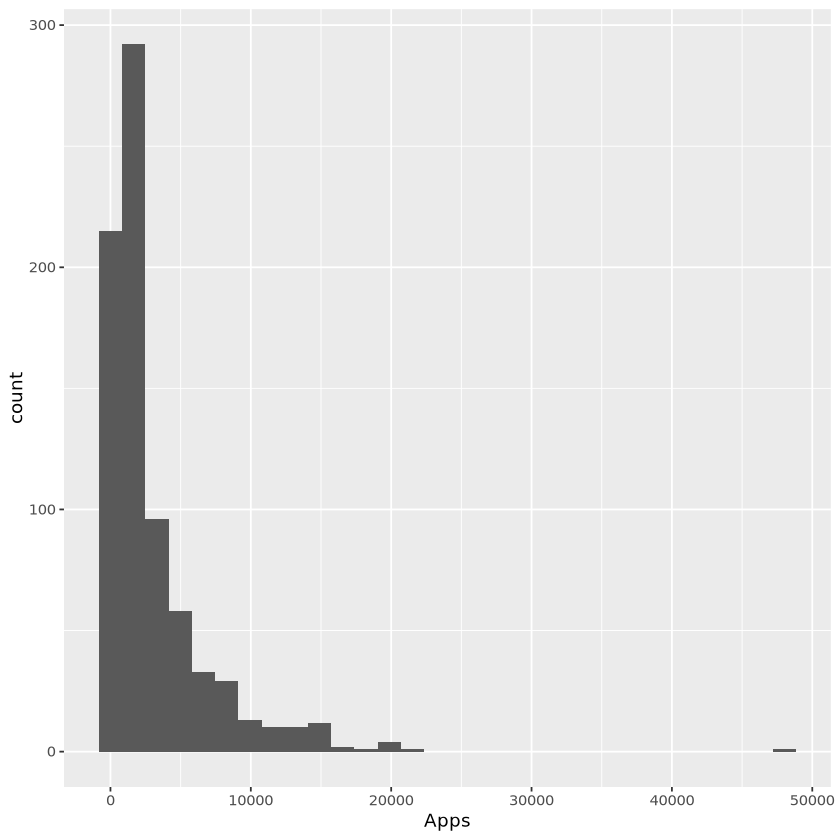

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


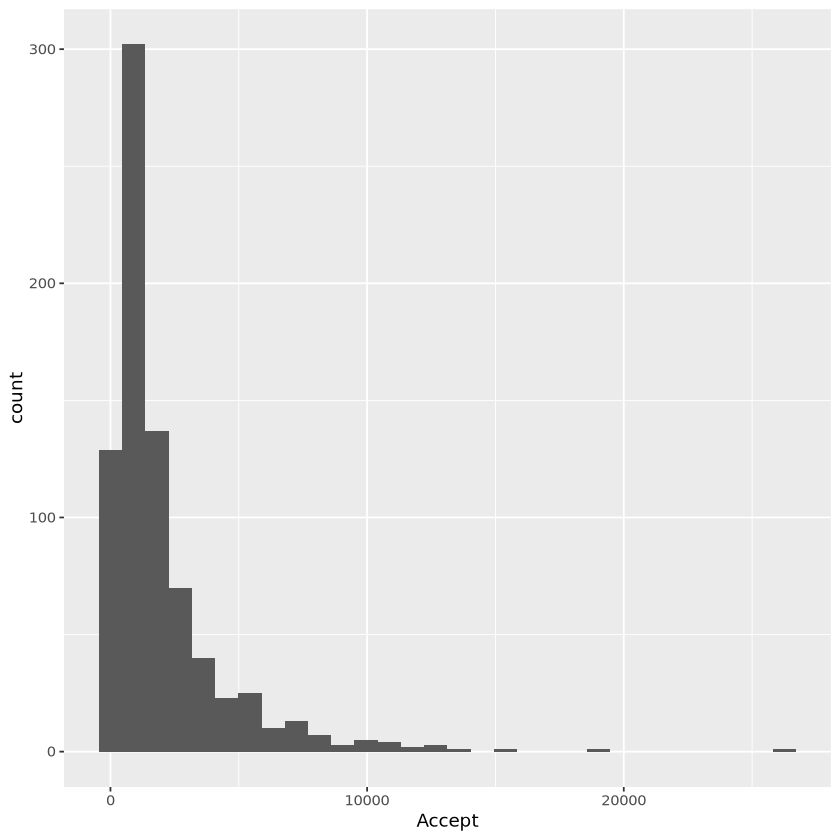

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


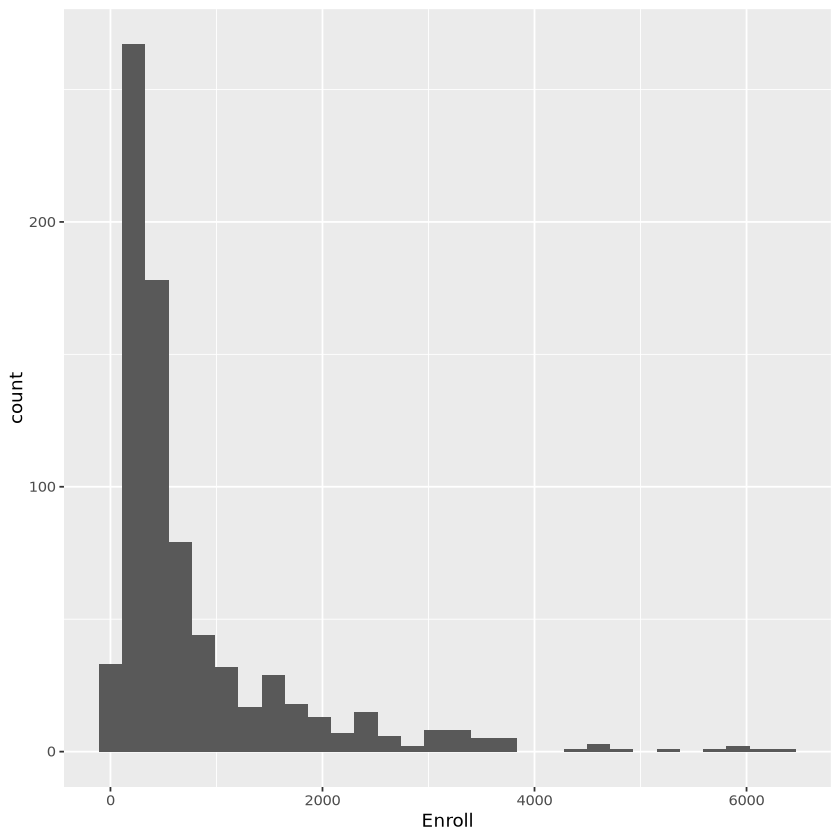

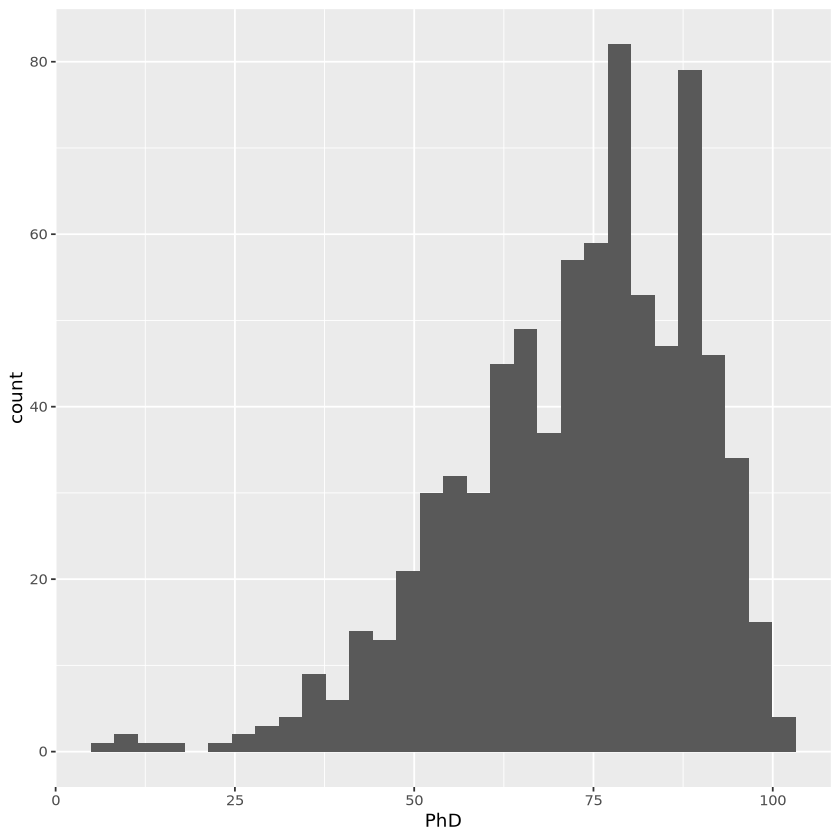

In [ ]:
# 然后就是直方图的展示了
par(mfrow=c(2,2))
hist(college$Apps)
hist(college$Accept)
hist(college$Enroll)
hist(college$PhD) 

# 建议使用ggplot
college %>% ggplot(mapping = aes(x=Apps)) + geom_histogram()
college %>% ggplot(mapping = aes(x=Accept)) + geom_histogram()
college %>% ggplot(mapping = aes(x=Enroll)) + geom_histogram()
college %>% ggplot(mapping = aes(x=PhD)) + geom_histogram()

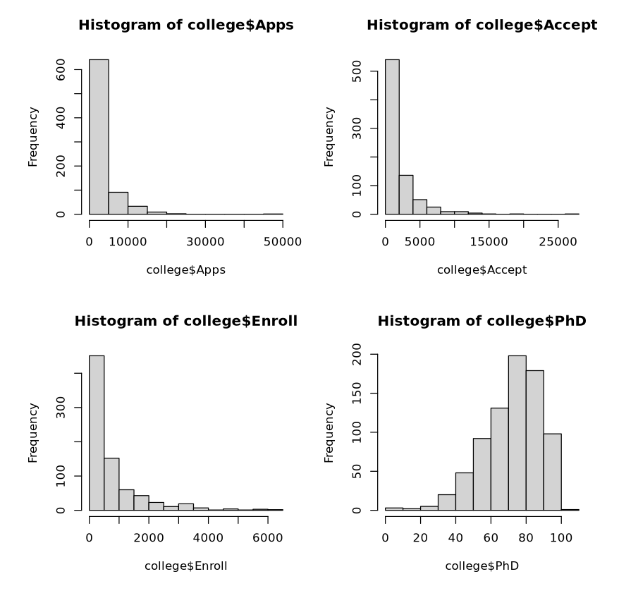

查看的直方图无非是申请人数，接受人数，入学人数，以及获得学校教师有无博士学位

前者逐渐递减，说明上学难，后者教育水平还可以看出来

Private mean(PhD)
1 No      76.83491 
2 Yes     71.09381


	Welch Two Sample t-test

data:  college$PhD by college$Private
t = 5.1381, df = 531.86, p-value = 3.904e-07
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 3.546110 7.936091
sample estimates:
 mean in group No mean in group Yes 
         76.83491          71.09381 


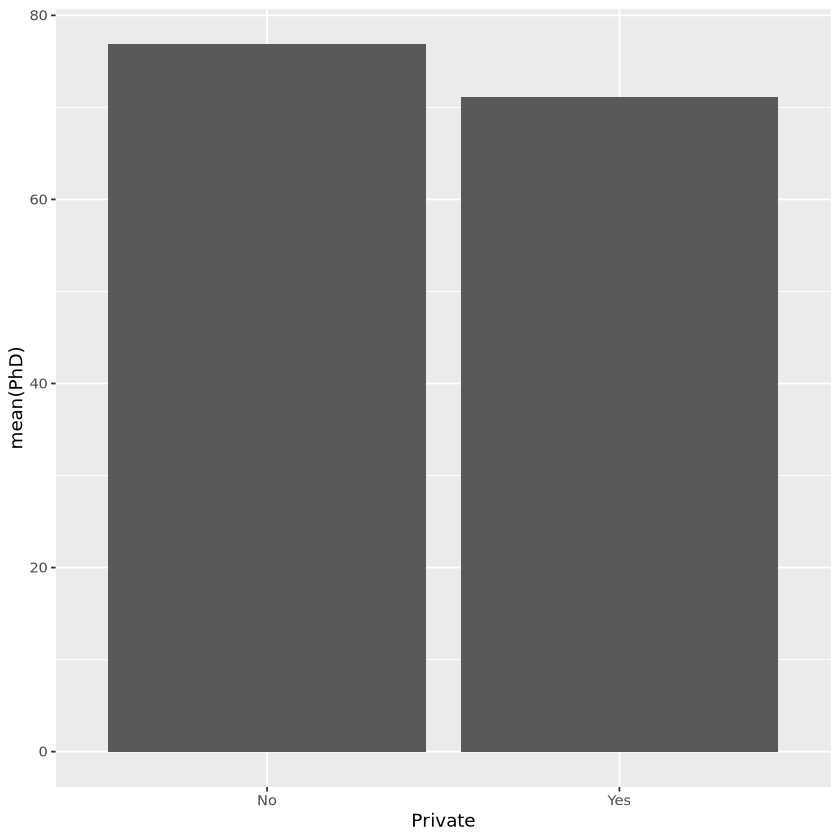

In [ ]:
# 自由探索，其实也无非就是tidyverse对一些变量分分组，然后看其他变量统计指标，再做做检验等

# 比如说公立学校和私立学校，师资水平如何，就是含有PhD的比例
college %>% group_by(Private) %>% summarise(mean(PhD)) #私立学校的PhD比例更低，有点出乎意料

college %>% group_by(Private) %>% summarise(mean(PhD)) %>% ggplot(mapping=aes(x=Private,y=`mean(PhD)`)) + geom_bar(stat='identity') #做一个检验
# 或者用t检验
t.test(college$PhD~college$Private)

Elite mean(PhD)
1 No    70.80114 
2 Yes   89.32051

Elite mean(Accept/Enroll)
1 No    2.660999           
2 Yes   2.873612

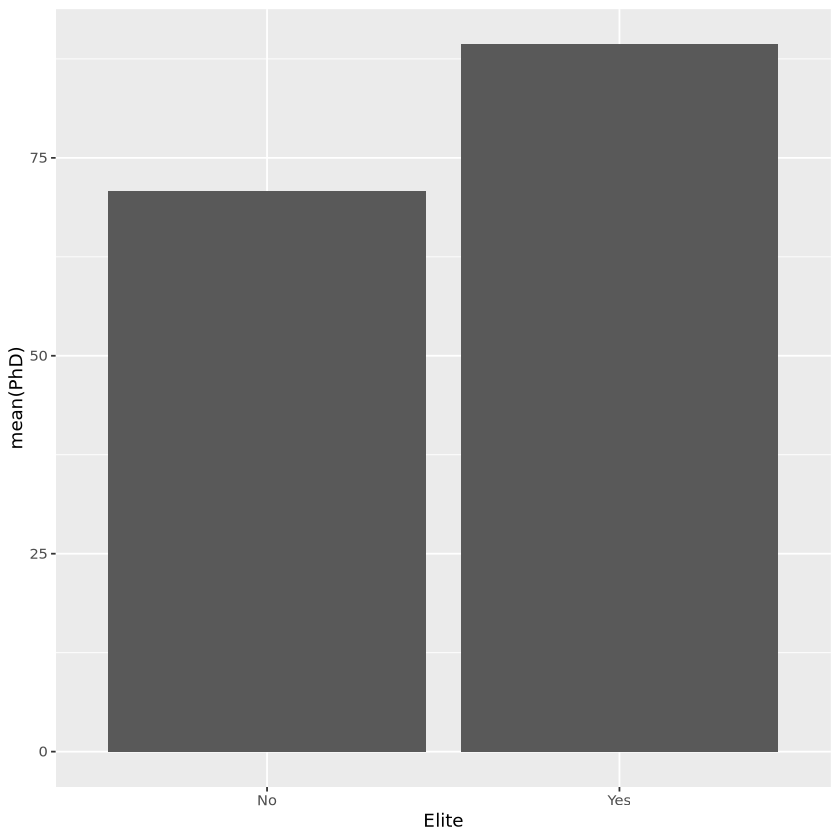

In [ ]:
# 我们再来看看精英学校和非精英学校的PhD比例，以及接受率（也就是申请的人数里有多少人接受了，大概这样）的差异
college %>% group_by(Elite) %>% summarise(mean(PhD)) #精英学校的PhD比例更高，这个是符合预期的

college %>% group_by(Elite) %>% summarise(mean(PhD)) %>% ggplot(mapping=aes(x=Elite,y=`mean(PhD)`)) + geom_bar(stat='identity')

college %>% group_by(Elite) %>% summarise(mean(Accept/Enroll)) #精英学校的接受率更高，这个可能是因为生源很棒，所以接受率更高

10，

In [ ]:
# a

# install.packages("ISLR2")
library(ISLR2)
head(Boston)
# ?Boston 

# A data.frame: 506 × 13
# 其实也可以使用dim来查看
dim(Boston)

crim    zn indus chas nox   rm    age  dis    rad tax ptratio lstat medv
1 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3    4.98  24.0
2 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8    9.14  21.6
3 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8    4.03  34.7
4 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7    2.94  33.4
5 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7    5.33  36.2
6 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 18.7    5.21  28.7

[1] 506  13

Rows: 506
Columns: 13
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15…
$ lstat   <dbl> 4.98, 9.14, 4.03, 2.94, 5.33, 5.21, 12.43, 19.15, 29.93, 17.10…
$ medv    <dbl> 24

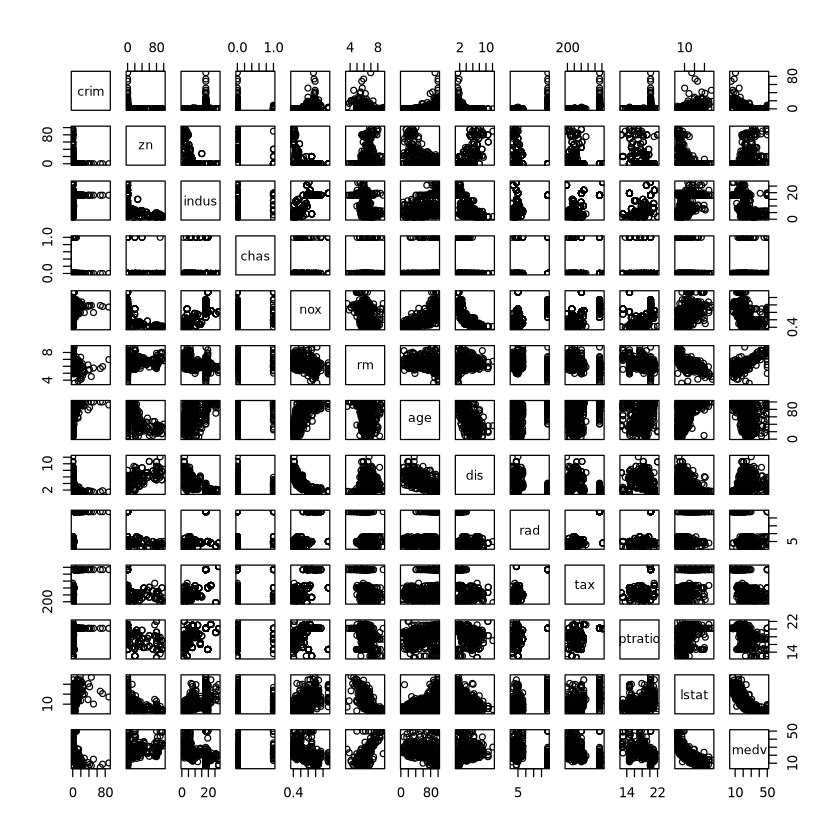

In [ ]:
# b

# 又是绘制配对散点图，pairs
glimpse(Boston) # 都是dbl，数字型，那用pairs没问题了
pairs(Boston)

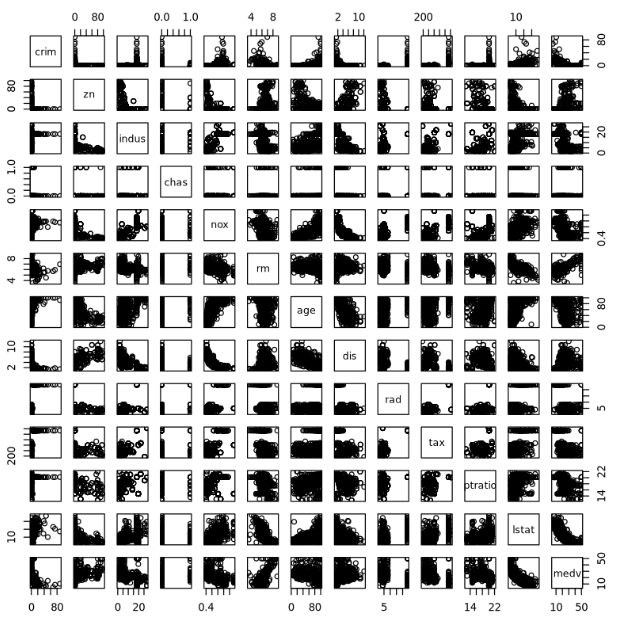

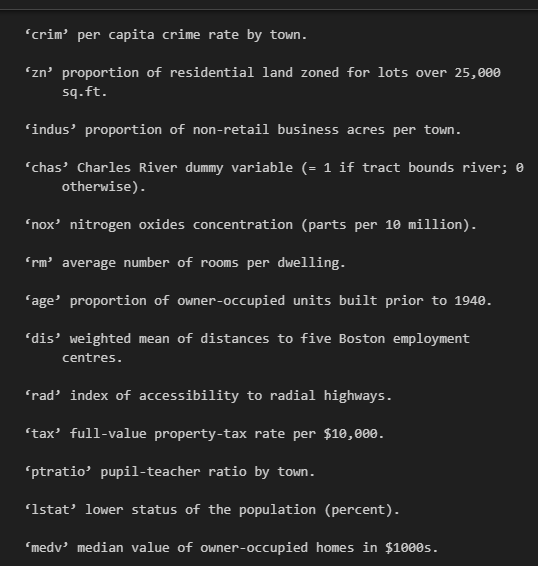

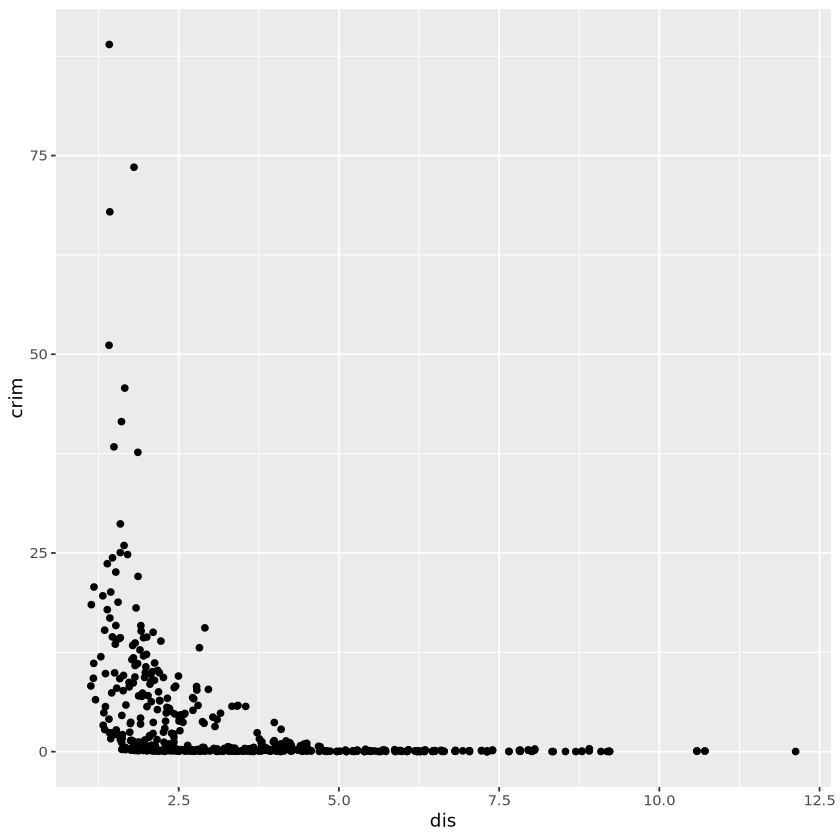

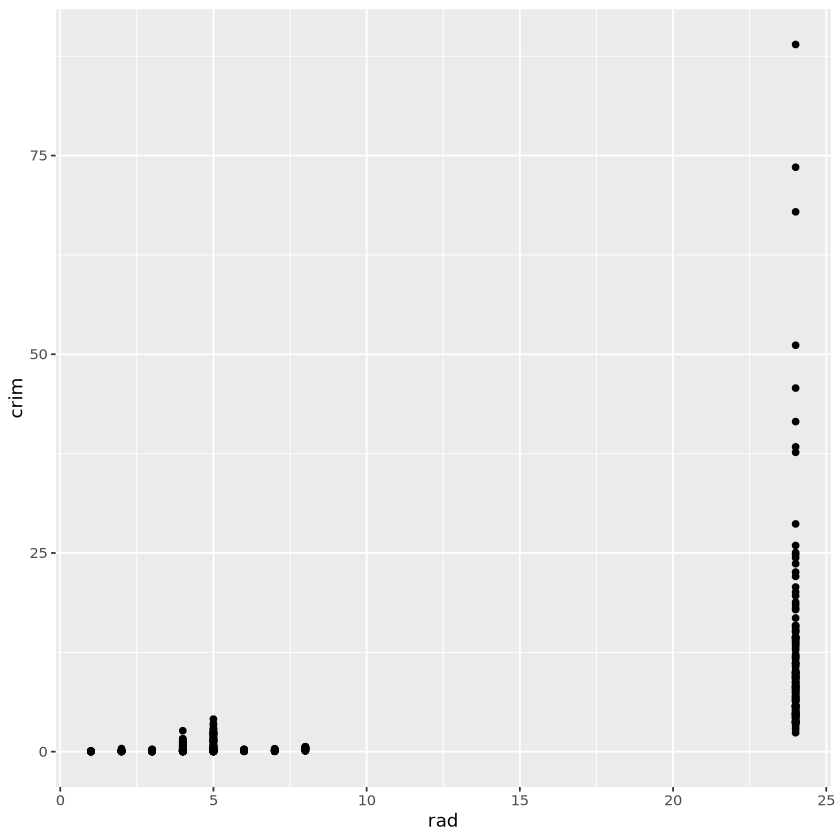

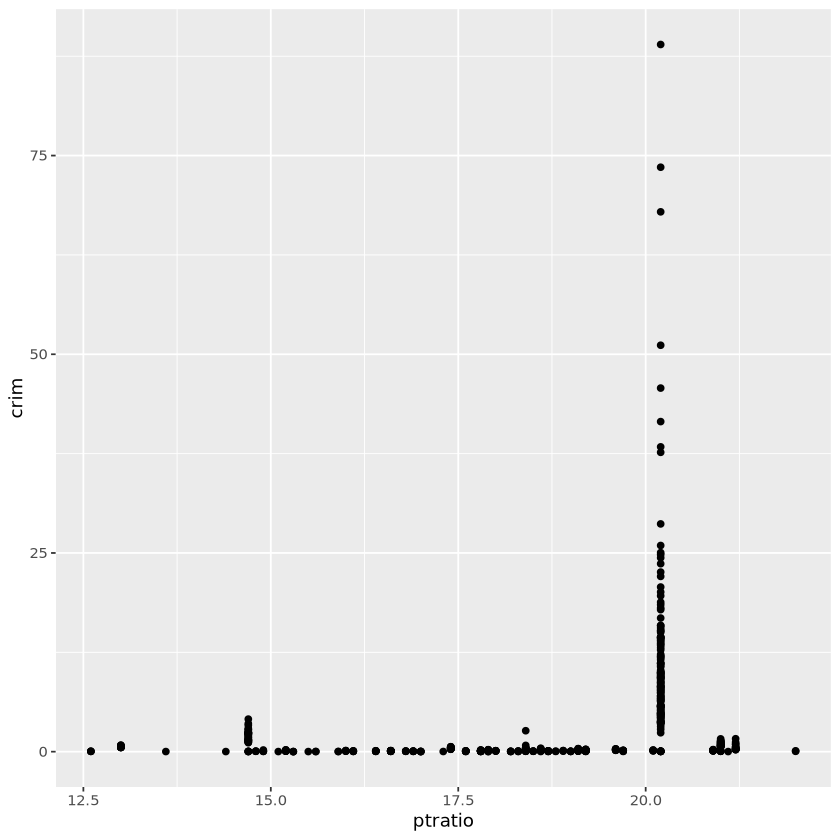

In [ ]:
# c

# 事实上，上面的图太糊了，我们最好是挑选一些var变量来查看，并且最好使用ggplot
# 我们可以挑选一些指标，比如说是crim和dis、rad、ptratio等

Boston %>% ggplot(mapping=aes(x = dis,y = crim))+geom_point() #这个是dis和crim的散点图，说明离开就业中心越远也就是越不发达的地区，犯罪率越低
Boston %>% ggplot(mapping=aes(x = rad,y = crim))+geom_point() # 这个是rad和crim的散点图，没啥规律，但是交通越发达地区，犯罪率一般很高
Boston %>% ggplot(mapping=aes(x = ptratio,y = crim))+geom_point() #生师比高的地方，也就是教育资源分配不均的地方，犯罪率也高

# 有很多变量都可以拿来和crim比较查看

In [ ]:
# ?Boston #  ‘crim’ per capita crime rate by town. 城镇的人均犯罪率
# particularly high crime rates,怎么衡量，翻过一件罪行的认为是高犯罪率，那么我们可以看看crim的分布
head(Boston) # 506 suburbs of Boston 波士顿506个郊区

crim    zn indus chas nox   rm    age  dis    rad tax ptratio lstat medv
1 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3    4.98  24.0
2 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8    9.14  21.6
3 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8    4.03  34.7
4 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7    2.94  33.4
5 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7    5.33  36.2
6 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 18.7    5.21  28.7

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


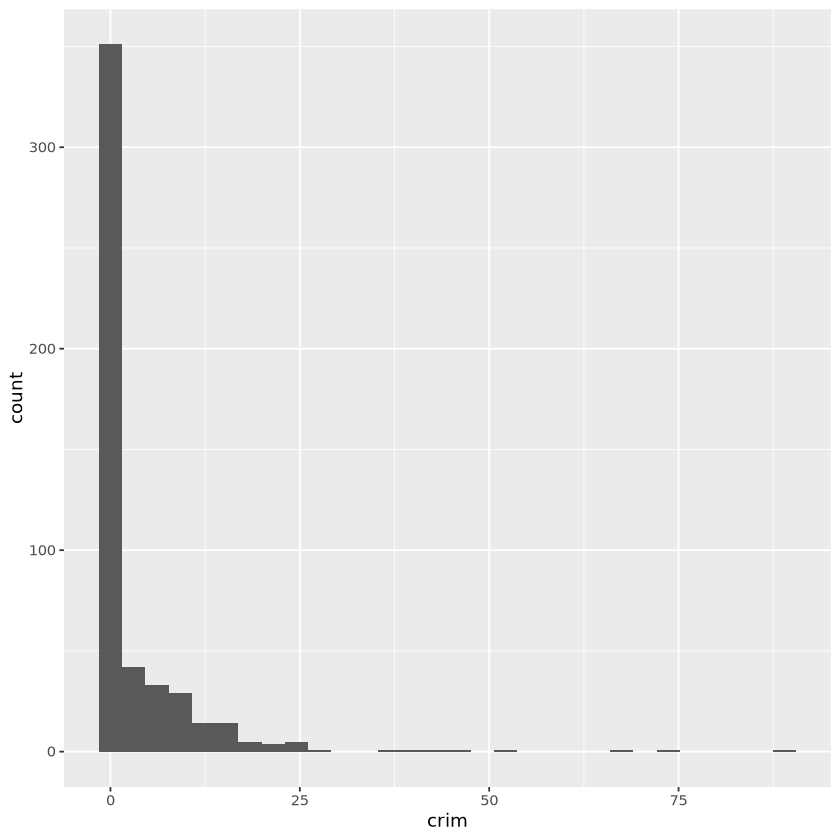

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


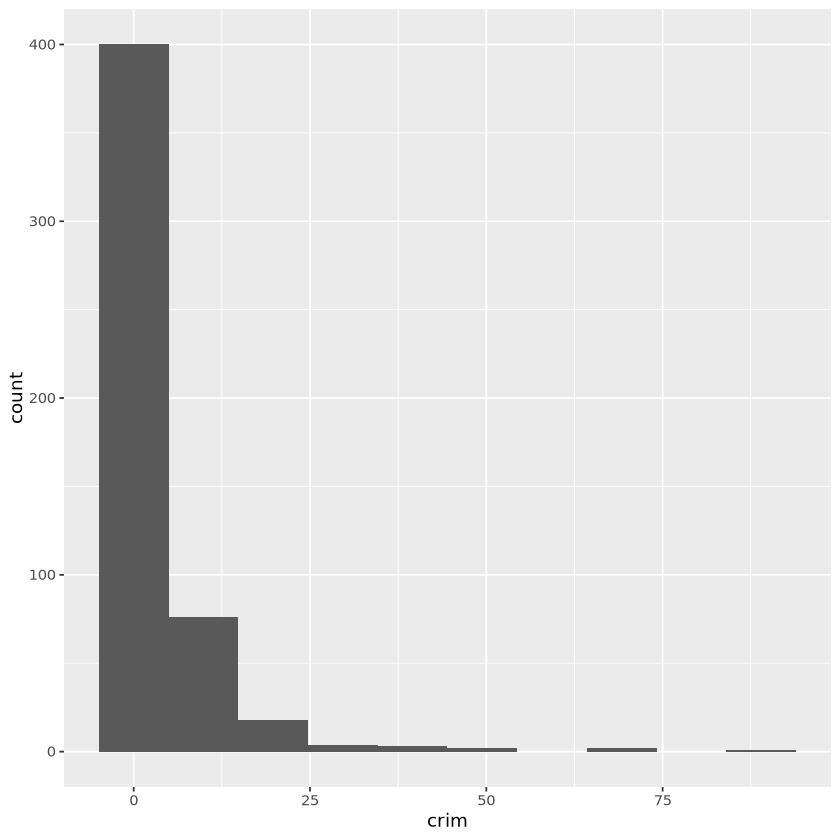

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


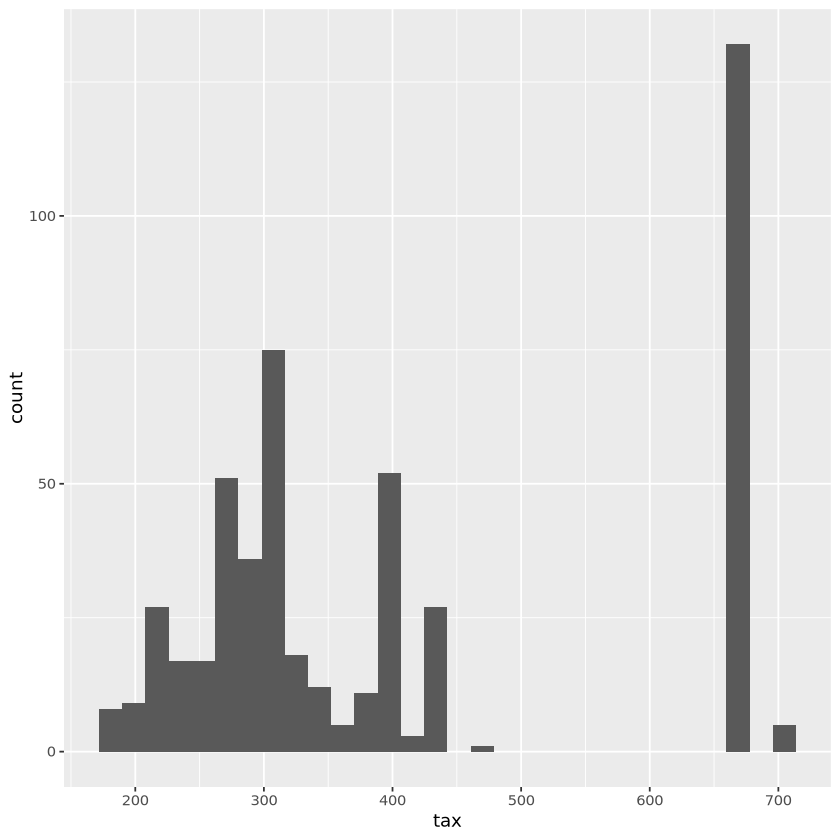

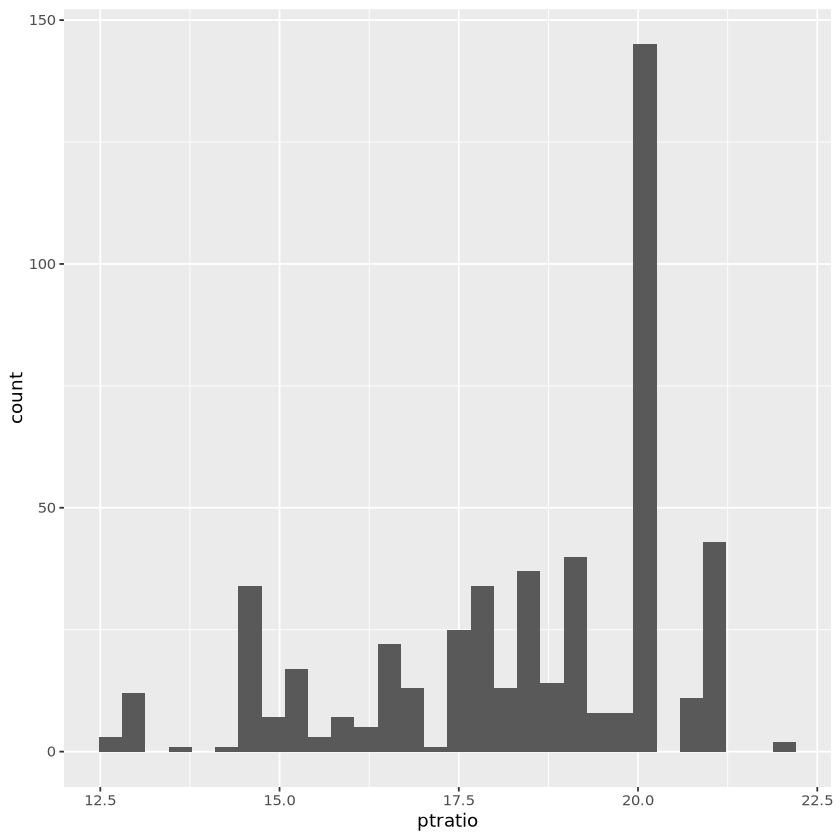

In [ ]:
# d

Boston %>% ggplot(mapping=aes(x = crim))+geom_histogram()
Boston %>% ggplot(mapping=aes(x = crim))+geom_histogram(bins = 10) # 大部分郊区还是低犯罪率的，但是有些郊区数值在75以上，人均了

Boston %>% ggplot(mapping=aes(x = tax))+geom_histogram() #税率普遍比较低

Boston %>% ggplot(mapping=aes(x = ptratio))+geom_histogram() #生师比普遍比较高，其实我们应该看师生比，也就是学生多少个老师，这个比例更好

In [ ]:
# e
Boston %>% filter(chas==1) %>% nrow() # 一共是35个地方

[1] 35

In [ ]:
# f

Boston %>% select(ptratio) %>% summary() # 可以看得出来median是19.05，最大值是22，最小值是12.6，所以这个指标还是比较均衡的

    ptratio     
 Min.   :12.60  
 1st Qu.:17.40  
 Median :19.05  
 Mean   :18.46  
 3rd Qu.:20.20  
 Max.   :22.00  

In [ ]:
# g

# ?Boston ‘medv’ median value of owner-occupied homes in $1000s. 自有住房价值中位数
Boston %>% filter(medv == min(medv)) #有2个城市，但是行index应该可以通过其他方法查看

subset(Boston,medv==min(Boston$medv)) # 可以看出来是第399和406行

crim    zn indus chas nox   rm    age dis    rad tax ptratio lstat medv
1 38.3518 0  18.1  0    0.693 5.453 100 1.4896 24  666 20.2    30.59 5   
2 67.9208 0  18.1  0    0.693 5.683 100 1.4254 24  666 20.2    22.98 5

crim    zn indus chas nox   rm    age dis    rad tax ptratio lstat medv
399 38.3518 0  18.1  0    0.693 5.453 100 1.4896 24  666 20.2    30.59 5   
406 67.9208 0  18.1  0    0.693 5.683 100 1.4254 24  666 20.2    22.98 5

In [ ]:
# h

# ?Boston #  ‘rm’ average number of rooms per dwelling. 每套住宅的平均房间数
Boston %>% filter(rm>7) # 64个是超过7个房间的
Boston %>% filter(rm>8) # 13个是超过8个房间的

# 然后就是一些统计
Boston %>% filter(rm>8) %>% summary()
# 可以和全面的数据比较
Boston %>% summary()

# 我们可以只比较mean均值
# crim更低，也就是犯罪率低，其他指标同样可以比较均值看出

crim     zn   indus chas nox    rm    age   dis    rad tax ptratio lstat
1  0.02729   0.0  7.07 0    0.4690 7.185 61.1  4.9671 2   242 17.8    4.03 
2  0.06905   0.0  2.18 0    0.4580 7.147 54.2  6.0622 3   222 18.7    5.33 
3  0.03359  75.0  2.95 0    0.4280 7.024 15.8  5.4011 3   252 18.3    1.98 
4  0.01311  90.0  1.22 0    0.4030 7.249 21.9  8.6966 5   226 17.9    4.81 
5  0.01951  17.5  1.38 0    0.4161 7.104 59.5  9.2229 3   216 18.6    8.05 
6  0.05660   0.0  3.41 0    0.4890 7.007 86.3  3.4217 2   270 17.8    5.50 
7  0.05302   0.0  3.41 0    0.4890 7.079 63.1  3.4145 2   270 17.8    5.70 
8  0.12083   0.0  2.89 0    0.4450 8.069 76.0  3.4952 2   276 18.0    4.21 
9  0.08187   0.0  2.89 0    0.4450 7.820 36.9  3.4952 2   276 18.0    3.57 
10 0.06860   0.0  2.89 0    0.4450 7.416 62.5  3.4952 2   276 18.0    6.19 
11 1.46336   0.0 19.58 0    0.6050 7.489 90.8  1.9709 5   403 14.7    1.73 
12 1.83377   0.0 19.58 1    0.6050 7.802 98.2  2.0407 5   403 14.7    1.92 
13 1.51902   0.0 19.58 1    0.6050 8.375 93.9  2.1620 5   403 14.7    3.32 
14 2.01019   0.0 19.58 0    0.6050 7.929 96.2  2.0459 5   403 14.7    3.70 
15 0.06588   0.0  2.46 0    0.4880 7.765 83.3  2.7410 3   193 17.8    7.56 
16 0.09103   0.0  2.46 0    0.4880 7.155 92.2  2.7006 3   193 17.8    4.82 
17 0.05602   0.0  2.46 0    0.4880 7.831 53.6  3.1992 3   193 17.8    4.45 
18 0.08370  45.0  3.44 0    0.4370 7.185 38.9  4.5667 5   398 15.2    5.39 
19 0.08664  45.0  3.44 0    0.4370 7.178 26.3  6.4798 5   398 15.2    2.87 
20 0.01381  80.0  0.46 0    0.4220 7.875 32.0  5.6484 4   255 14.4    2.97 
21 0.04011  80.0  1.52 0    0.4040 7.287 34.1  7.3090 2   329 12.6    4.08 
22 0.04666  80.0  1.52 0    0.4040 7.107 36.6  7.3090 2   329 12.6    8.61 
23 0.03768  80.0  1.52 0    0.4040 7.274 38.3  7.3090 2   329 12.6    6.62 
24 0.01778  95.0  1.47 0    0.4030 7.135 13.9  7.6534 3   402 17.0    4.45 
25 0.02177  82.5  2.03 0    0.4150 7.610 15.7  6.2700 2   348 14.7    3.11 
26 0.03510  95.0  2.68 0    0.4161 7.853 33.2  5.1180 4   224 14.7    3.81 
27 0.02009  95.0  2.68 0    0.4161 8.034 31.9  5.1180 4   224 14.7    2.88 
28 0.31533   0.0  6.20 0    0.5040 8.266 78.3  2.8944 8   307 17.4    4.14 
29 0.52693   0.0  6.20 0    0.5040 8.725 83.0  2.8944 8   307 17.4    4.63 
30 0.38214   0.0  6.20 0    0.5040 8.040 86.5  3.2157 8   307 17.4    3.13 
⋮  ⋮        ⋮    ⋮     ⋮    ⋮      ⋮     ⋮     ⋮      ⋮   ⋮   ⋮       ⋮    
35  0.33147  0    6.20 0    0.5070 8.247  70.4 3.6519  8  307 17.4     3.95
36  0.51183  0    6.20 0    0.5070 7.358  71.6 4.1480  8  307 17.4     4.73
37  0.36894 22    5.86 0    0.4310 8.259   8.4 8.9067  7  330 19.1     3.54
38  0.01538 90    3.75 0    0.3940 7.454  34.2 6.3361  3  244 15.9     3.11
39  0.61154 20    3.97 0    0.6470 8.704  86.9 1.8010  5  264 13.0     5.12
40  0.66351 20    3.97 0    0.6470 7.333 100.0 1.8946  5  264 13.0     7.79
41  0.54011 20    3.97 0    0.6470 7.203  81.8 2.1121  5  264 13.0     9.59
42  0.53412 20    3.97 0    0.6470 7.520  89.4 2.1398  5  264 13.0     7.26
43  0.52014 20    3.97 0    0.6470 8.398  91.5 2.2885  5  264 13.0     5.91
44  0.82526 20    3.97 0    0.6470 7.327  94.5 2.0788  5  264 13.0    11.25
45  0.55007 20    3.97 0    0.6470 7.206  91.6 1.9301  5  264 13.0     8.10
46  0.78570 20    3.97 0    0.6470 7.014  84.6 2.1329  5  264 13.0    14.79
47  0.57834 20    3.97 0    0.5750 8.297  67.0 2.4216  5  264 13.0     7.44
48  0.54050 20    3.97 0    0.5750 7.470  52.6 2.8720  5  264 13.0     3.16
49  0.22188 20    6.96 1    0.4640 7.691  51.8 4.3665  3  223 18.6     6.58
50  0.10469 40    6.41 1    0.4470 7.267  49.0 4.7872  4  254 17.6     6.05
51  0.03578 20    3.33 0    0.4429 7.820  64.5 4.6947  5  216 14.9     3.76
52  0.06129 20    3.33 1    0.4429 7.645  49.7 5.2119  5  216 14.9     3.01
53  0.01501 90    1.21 1    0.4010 7.923  24.8 5.8850  1  198 13.6     3.16
54  0.00906 90    2.97 0    0.4000 7.088  20.8 7.3073  1  285 15.3     7.85
55  0.07886 80    4.95 0    0.4110 7.148  27.7 5.11

crim    zn indus chas nox    rm    age  dis    rad tax ptratio lstat medv
1  0.12083  0  2.89 0    0.4450 8.069 76.0 3.4952  2  276 18.0    4.21  38.7
2  1.51902  0 19.58 1    0.6050 8.375 93.9 2.1620  5  403 14.7    3.32  50.0
3  0.02009 95  2.68 0    0.4161 8.034 31.9 5.1180  4  224 14.7    2.88  50.0
4  0.31533  0  6.20 0    0.5040 8.266 78.3 2.8944  8  307 17.4    4.14  44.8
5  0.52693  0  6.20 0    0.5040 8.725 83.0 2.8944  8  307 17.4    4.63  50.0
6  0.38214  0  6.20 0    0.5040 8.040 86.5 3.2157  8  307 17.4    3.13  37.6
7  0.57529  0  6.20 0    0.5070 8.337 73.3 3.8384  8  307 17.4    2.47  41.7
8  0.33147  0  6.20 0    0.5070 8.247 70.4 3.6519  8  307 17.4    3.95  48.3
9  0.36894 22  5.86 0    0.4310 8.259  8.4 8.9067  7  330 19.1    3.54  42.8
10 0.61154 20  3.97 0    0.6470 8.704 86.9 1.8010  5  264 13.0    5.12  50.0
11 0.52014 20  3.97 0    0.6470 8.398 91.5 2.2885  5  264 13.0    5.91  48.8
12 0.57834 20  3.97 0    0.5750 8.297 67.0 2.4216  5  264 13.0    7.44  50.0
13 3.47428  0 18.10 1    0.7180 8.780 82.9 1.9047 24  666 20.2    5.29  21.9

      crim               zn            indus             chas       
 Min.   :0.02009   Min.   : 0.00   Min.   : 2.680   Min.   :0.0000  
 1st Qu.:0.33147   1st Qu.: 0.00   1st Qu.: 3.970   1st Qu.:0.0000  
 Median :0.52014   Median : 0.00   Median : 6.200   Median :0.0000  
 Mean   :0.71879   Mean   :13.62   Mean   : 7.078   Mean   :0.1538  
 3rd Qu.:0.57834   3rd Qu.:20.00   3rd Qu.: 6.200   3rd Qu.:0.0000  
 Max.   :3.47428   Max.   :95.00   Max.   :19.580   Max.   :1.0000  
      nox               rm             age             dis       
 Min.   :0.4161   Min.   :8.034   Min.   : 8.40   Min.   :1.801  
 1st Qu.:0.5040   1st Qu.:8.247   1st Qu.:70.40   1st Qu.:2.288  
 Median :0.5070   Median :8.297   Median :78.30   Median :2.894  
 Mean   :0.5392   Mean   :8.349   Mean   :71.54   Mean   :3.430  
 3rd Qu.:0.6050   3rd Qu.:8.398   3rd Qu.:86.50   3rd Qu.:3.652  
 Max.   :0.7180   Max.   :8.780   Max.   :93.90   Max.   :8.907  
      rad              tax           ptratio          l

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

# 